# **PACKAGE IMPORTS**

#### _misc packages;_

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

#### _preprocessing packages;_

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

#### _visualisation packages;_

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

#### _ml model packages;_

In [4]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

#### _ml evaluation packages;_

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
import time as t

#### _ml optimisation packages;_

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### **filter warnings;**

In [7]:
import warnings as w

w.filterwarnings('ignore')

# **FUNCTIONS**

### **GENERAL_INFO()**
#### _a function to summarise a dataset is defined leveraging methods from the {pandas} package;_

In [8]:
def GENERAL_INFO(dataset):

    """.
    
    DISPLAYS A DATA SUMMARY OF A PANDAS DATAFRAME, PARAMETER INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe
    """
        
    # the number of rows and columns are displayed with attribute {df.shape};
        
    shape = dataset.shape
        
    # important statistical values present within each column and 
    # the overall dataset are found using method {df.describe()};
    
    importantvals = dataset.describe()
        
    # the first 5 rows are viewed with method {df.head()};
    
    first5 = dataset.head()
    
    # the last 5 rows are viewed with method {df.tail()};
        
    last5 = dataset.tail()
        
    # the overall count of missing / NaN values are determined by combining
    # {df.isna()} and {df.sum()} methods;
        
    missing = dataset.isna().sum()
        
    # dtypes present are exclusively printed with method {df.dtypes()};
        
    dtypes = dataset.dtypes
        
    # number of unique values present within each column are displayed with
    # method {df.features()};
        
    unique = dataset.nunique()
        
        
    # all of the above info is stored in a multiline string to increase
    # interpretability and this string is printed;
        
    general_info = f''' 
    rows / columns:
        
    {shape}
        
        
    important statistical values: 
        
    {importantvals}
        
        
    first 5 rows:
        
    {first5}
    
    
    last 5 rows:
    
    {last5}
        
        
    missing values (?):
        
    {missing}
        
        
    unique values:
        
    {unique}
        
        
    data types present:
        
    {dtypes}


    structure:

    {dataset.info}
    
    '''

    # 'memory usage, null data, data types present and overall structure
    #  is displayed with method {df.info()}'
    
    print(general_info)

### **HISTOGRAM()** 
#### _a function to display a histogram is defined using {matplotlib.pyplot};_

In [9]:
def HISTOGRAM(dataset, 
              colour, 
              title,
              transparency = 0.9,
              x = 'val',
              y = 'freq',
              fsize_title = 16,
              fsize_label = 12):

    """.
    
    GENERATES A HISTOGRAM, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe
    
    colour : colour as a string
    
    transparency : float value between 0 and 1
    
    title, x, y : any string value 
    
    fsize_title, fsize_label : any integer value, ideally between 8 and 20
    """

    # {plt.hist()} is used to define key information
    # to be plotted;
    
    plt.figure(figsize = (10, 8))
    plt.hist(dataset, 
             color = colour,
             edgecolor = 'black',
             alpha = transparency)
                            
    # labels are then defined...
        
    plt.title(title,
              fontsize = fsize_title,)
    plt.xlabel(x, 
               fontsize = fsize_label)
    plt.ylabel(y,
               fontsize = fsize_label)
    
    # and the resulting histogram is displayed;
        
    plt.show

### **BAR_CHART()**
#### _a function to display a bar chart is defined using {matplotlib.pyplot};_

In [10]:
def BAR_CHART(dataset, 
              target,
              colour = 'plasma',
              title = 'Distribution',
              x = 'Target',
              y = 'Count',
              fsize_title = 16,
              fsize_label = 12):

    """.
    
    GENERATES A BAR CHART, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe (df)

    target : df column name as a string

    index : df column name as a string
    
    colour : colour as a string
    
    transparency : float value between 0 and 1
    
    title, x, y : any string value 
    
    fsize_(title/label) : font size as an integer
    """
        
    # unique target values and their respective counts are instantiated 
    # to the {distribution} variable;

    dataset = target.reset_index(drop = True)
        
    distribution = target.value_counts()
    
    # size of the chart is defined with matplotlib method {plt.figuire()} accepting
    # a tuple containing x and y dimensions as 2 integers {figsize = (10, 8)};
        
    plt.figure(figsize = (10, 8))
    
    # x and y axis values are assigned using attributes {distribution.index} and {distribution.values}
    # (each representing target names and their respective overall count) correspondingly,
    # palette is selected with parameter {colour} to present the chart within a given 
    # colour palette; 
        
    sns.barplot(x = distribution.index, 
                y = distribution.values,
                palette = colour)
     
    # {title()}, {xlabel()}, and {ylabel()} methods are called to display the title 
    # of the chart and the titles of the x and y axis;
        
    plt.title(title, 
              fontsize = fsize_title)
    
    plt.xlabel(x, 
               fontsize = fsize_label)
    plt.ylabel(y, 
               fontsize = fsize_label)
    plt.xticks(ticks = range(len(distribution.index)),
               labels = distribution.index,
               rotation = 0)
    
    # bar chart is displayed by calling attribute {plt.show};
    
    plt.show

### **OUTLIER_DETECTOR()** 
#### _a function to display the amount of outliers per column is defined using {pandas};_

In [11]:
def OUTLIER_DETECTOR(dataset, 
                     target):

    """.
    
    DISPLAYS THE AMOUNT OF OUTLIERS PRESENT PER COLUMN
    FOR A GIVEN PANDAS DATAFRAME

    
    dataset : Pandas DataFrame
    
    target : target column(s) as a list of string value(s)
    """

    # instantiate a version of the DataFrame without the target column to
    # the variable {outlier_detection};
        
    outlier_detection = dataset.drop(columns = target)
        
    # use method {df.quantile()} to determine the lower quartile;
        
    Q1 = outlier_detection.quantile(0.25)
        
    # and repeat to find the higher quartile;
        
    Q3 = outlier_detection.quantile(0.75)
        
    # calculate interquartile range by subtracting the lower quartile
    # from the higher quartile;
        
    IQR = Q3 - Q1
        
    # detect outliers by first setting an upper and lower bound limit,
    # then instantiate any values that sit above or below this bound to 
    # the variable {outliers} as a tuple;
        
    outliers = ((outlier_detection < (Q1 - 1.5 * IQR)) | 
                (outlier_detection > (Q3 + 1.5 * IQR)))
        
    # calculate the total number of outliers present within tuple {outliers}
    # and instantiate this value to the variable {outlier_total};
        
    outlier_total = outliers.sum()
        
    # store this data in an interpretable manner within a multi-line
    # f-string...
        
    outlier_info = f'''outliers per column: 
        
    {outlier_total}'''
        
    # ...and display these results;
        
    print(outlier_info)  

### **ONEHOT_ENCODE()**
#### _a function to one-hot encode a DataFrame feature in the form of a numpy array is defined leveraging {keras} and {numpy};_

In [12]:
def ONEHOT_ENCODE(dataset,
                  target,
                  datatype = 'bool',
                  drop = True):

    """.
    
    ONE-HOT ENCODES AN INPUT TARGET USING
    PANDAS [get_dummies()] METHOD, PARAMETER INPUT
    IS:


    dataset : pandas DataFrame

    target : column name(s) as a list of string value(s)

    datatype : 'bool' or 'int' as a string value

    drop : True or False boolean value

    RECCOMMENDED FOR ONEHOT ENCODING CATEGORICAL
    DATATYPES
    """

    dataset = pd.get_dummies(data = dataset, 
                             columns = target,
                             dtype = datatype)

    # return the resulting array;
    
    return dataset

### **CONFUSION()**
#### _a function to generate a confusion matrix visual to evaluate classification ML models;_

In [13]:
def CONFUSION(dataset):

    
    """.
    
    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.
    
    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values' 
    """   

    # actual values are stored in variable {actual};
    
    actual = dataset['Actual Values']

    # predicted values are stored in variable {predicted};
    
    predicted = dataset['Predicted Values']

    # confusion matrix of {actual} and {predicted} values is instantiated
    # to variable {cm};
    
    cm = confusion_matrix(actual,
                          predicted)

    # display labels are instantiated to variable {dl}, and are
    # deciphered by creating an organised list of unique values
    # present in the column {dataset['Predicted Values']};

    dl = sorted(list(dataset['Actual Values'].unique()))

    # the heatmap is then stored in vairable {cm_display};
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                        display_labels = dl)

    # and displayed using {matplotlib} methods {.plot()}
    # and function {plt.show()};
    
    cm_display.plot()
    plt.show() 

# **EXPLORATORY DATA ANALYSIS**

In [14]:
df_bikes = pd.read_excel('biking_dataset.xlsx')

df_bikes

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


In [15]:
help(GENERAL_INFO)

Help on function GENERAL_INFO in module __main__:

GENERAL_INFO(dataset)
    .

    DISPLAYS A DATA SUMMARY OF A PANDAS DATAFRAME, PARAMETER INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe



In [16]:
GENERAL_INFO(df_bikes)

 
    rows / columns:
        
    (900, 8)
        
        
    important statistical values: 
        
            Rider Age  Ride Duration (min)  Distance Covered (km)  \
count  885.000000           887.000000             887.000000   
mean    39.264407            62.225479              20.130530   
std     12.373803            33.956434              11.178777   
min     18.000000             5.000000               0.510000   
25%     29.000000            32.000000              10.830000   
50%     39.000000            62.000000              19.990000   
75%     50.000000            92.000000              29.155000   
max     60.000000           120.000000              39.870000   

       Bike Rental Cost ($)  
count            891.000000  
mean              26.581470  
std                9.438224  
min                7.330000  
25%               19.210000  
50%               27.040000  
75%               33.955000  
max               48.380000  
        
        
    first 5 rows

In [17]:
null_data = df_bikes[df_bikes.isnull().any(axis = 1)]

null_data

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
15,New York,NaN,41.0,Standard,53.0,NaN,Medium,21.24
73,Dublin,Sunny,30.0,NaN,NaN,11.93,NaN,28.91
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
105,NaN,Sunny,NaN,Electric,110.0,21.74,High,41.27
119,Dublin,Cloudy,49.0,Mountain,119.0,NaN,Medium,40.66
143,San Francisco,Rainy,NaN,Mountain,NaN,28.10,Low,25.13
159,Chicago,Cloudy,56.0,NaN,NaN,4.95,Medium,11.32
170,San Francisco,Snowy,22.0,NaN,84.0,11.76,NaN,26.77
179,Berlin,Sunny,59.0,Mountain,72.0,24.96,NaN,NaN
218,NaN,Sunny,31.0,Standard,61.0,NaN,Medium,20.23


# **VISUALISATIONS**

In [18]:
help(ONEHOT_ENCODE)

Help on function ONEHOT_ENCODE in module __main__:

ONEHOT_ENCODE(dataset, target, datatype='bool', drop=True)
    .

    ONE-HOT ENCODES AN INPUT TARGET USING
    PANDAS [get_dummies()] METHOD, PARAMETER INPUT
    IS:


    dataset : pandas DataFrame

    target : column name(s) as a list of string value(s)

    datatype : 'bool' or 'int' as a string value

    drop : True or False boolean value

    RECCOMMENDED FOR ONEHOT ENCODING CATEGORICAL
    DATATYPES



In [19]:
df_bikes

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


- _an encoded dataset is created and instantiated to {visualisations}_ 
- _parent DataFrame {df_bikes} is not encoded yet as more preprocessing is still required at this stage..._

In [20]:
# feature {['Rider Satisfaction']} is ordinal...

# label encoding is performed by first manually
# assigning integer values to represent each 
# level of customer satisfaction hierarchically,
# and instantiating this dictionary to {mapping};

satisfaction_mapping = {'Low': 0,
                        'Medium': 1,
                        'High': 2}

# nominal categorical variables are one-hot encoded
# leveraging function {ONEHOT_ENCODE()};

visualisations = ONEHOT_ENCODE(dataset = df_bikes,
                               target = ['City', 
                                         'Bike Model',
                                         'Weather Condition',
                                         'Rider Satisfaction'],
                               datatype = 'int',
                               drop = False)

# feature {['Rider Satisfaction']} is then label encoded by mapping
# each previously assigned integer value using method {df.map} and 
# dictionary {mapping}

# visualisations['Rider Satisfaction'] = df_bikes['Rider Satisfaction'].map(satisfaction_mapping)

# visualisations['Weather Condition'] = df_bikes['Weather Condition'].map(weather_mapping)

visualisations = visualisations.reset_index(drop = False)

visualisations

,index,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),City_Berlin,City_Chicago,City_Dublin,City_London,City_New York,...,Bike Model_Manual,Bike Model_Mountain,Bike Model_Standard,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Rider Satisfaction_High,Rider Satisfaction_Low,Rider Satisfaction_Medium
0,0,53.0,62.0,2.25,22.63,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,1,39.0,5.0,21.67,7.87,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,2,43.0,106.0,28.40,39.40,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,24.0,119.0,5.66,37.63,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,4,24.0,11.0,25.74,13.12,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,55.0,55.0,28.35,26.30,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
896,896,47.0,14.0,11.99,13.78,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
897,897,49.0,23.0,2.78,20.47,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
898,898,19.0,110.0,2.27,39.62,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [21]:
visualisations.isnull()

,index,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),City_Berlin,City_Chicago,City_Dublin,City_London,City_New York,...,Bike Model_Manual,Bike Model_Mountain,Bike Model_Standard,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Rider Satisfaction_High,Rider Satisfaction_Low,Rider Satisfaction_Medium
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### _**histograms...**_

In [22]:
help(HISTOGRAM)

Help on function HISTOGRAM in module __main__:

HISTOGRAM(dataset, colour, title, transparency=0.9, x='val', y='freq', fsize_title=16, fsize_label=12)
    .

    GENERATES A HISTOGRAM, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe

    colour : colour as a string

    transparency : float value between 0 and 1

    title, x, y : any string value

    fsize_title, fsize_label : any integer value, ideally between 8 and 20



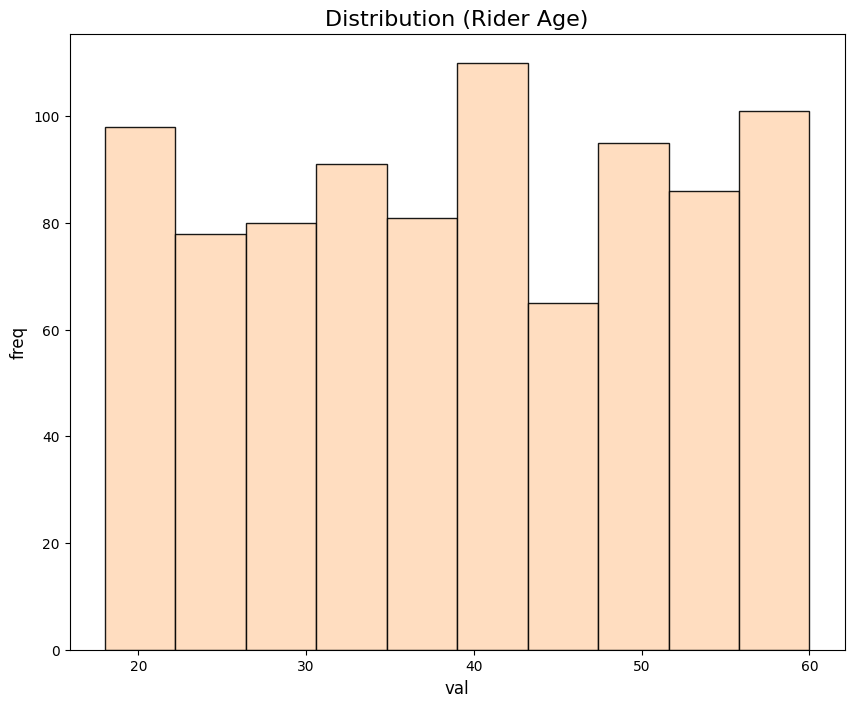

In [23]:
HISTOGRAM(df_bikes['Rider Age'],
          colour = 'peachpuff',
          title = 'Distribution (Rider Age)')

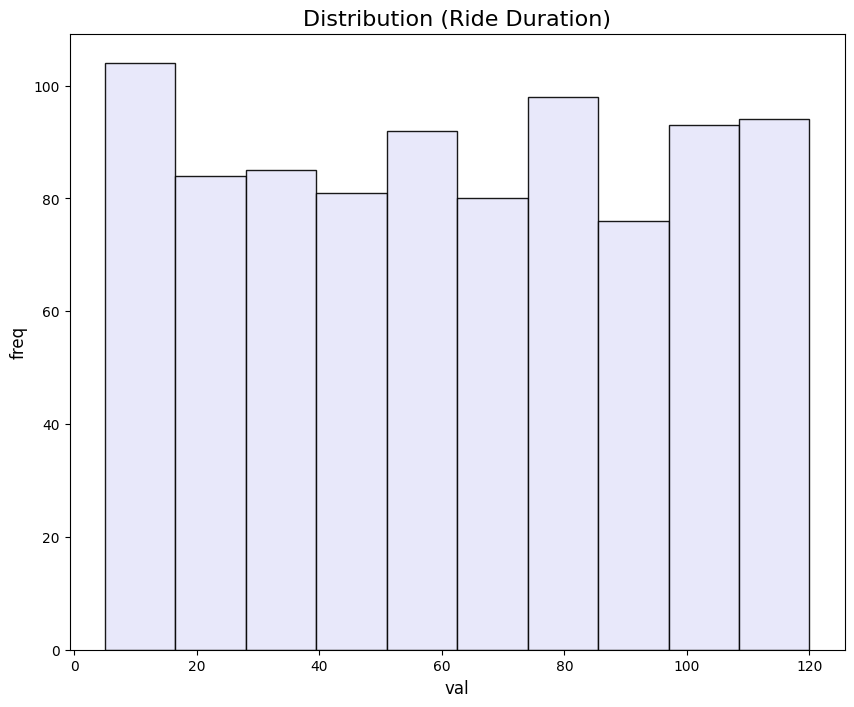

In [24]:
HISTOGRAM(df_bikes['Ride Duration (min)'],
          colour = 'lavender',
          title = 'Distribution (Ride Duration)')

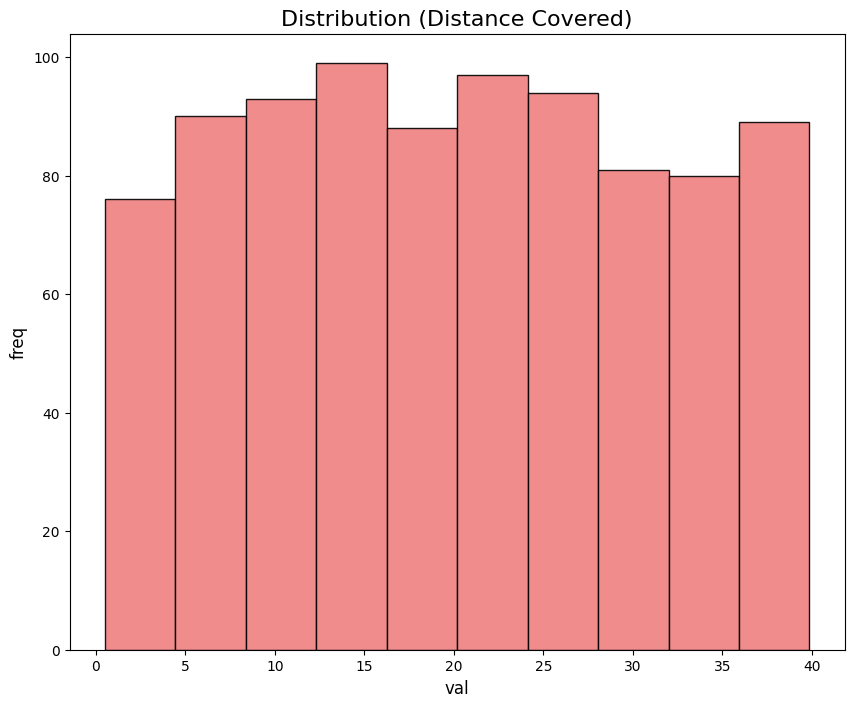

In [25]:
HISTOGRAM(df_bikes['Distance Covered (km)'],
          colour = 'lightcoral',
          title = 'Distribution (Distance Covered)')

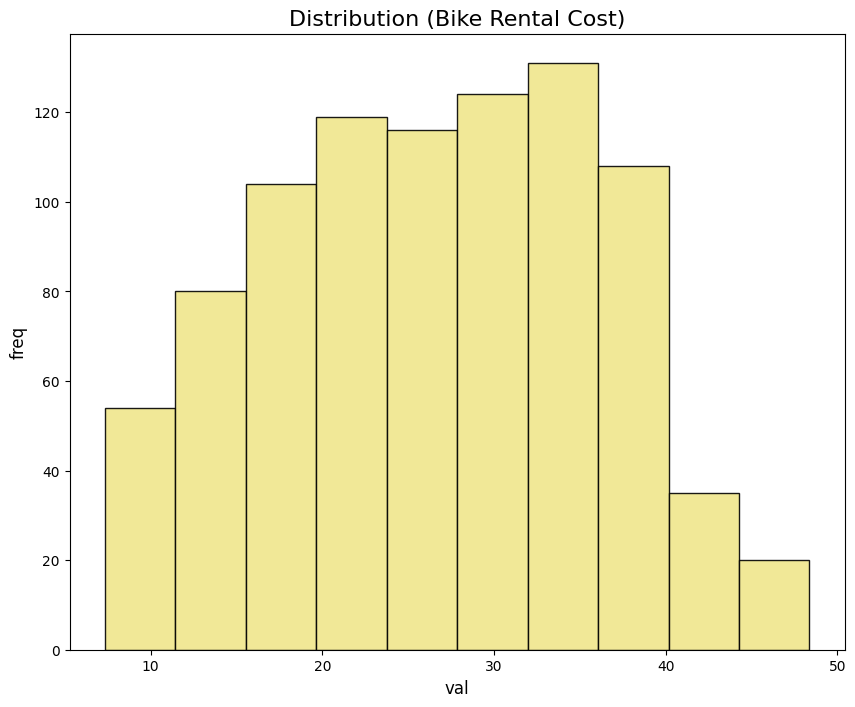

In [26]:
HISTOGRAM(df_bikes['Bike Rental Cost ($)'],
          colour = 'khaki',
          title = 'Distribution (Bike Rental Cost)')

### _**bar charts...**_

In [27]:
help(BAR_CHART)

Help on function BAR_CHART in module __main__:

BAR_CHART(dataset, target, colour='plasma', title='Distribution', x='Target', y='Count', fsize_title=16, fsize_label=12)
    .

    GENERATES A BAR CHART, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe (df)

    target : df column name as a string

    index : df column name as a string

    colour : colour as a string

    transparency : float value between 0 and 1

    title, x, y : any string value

    fsize_(title/label) : font size as an integer



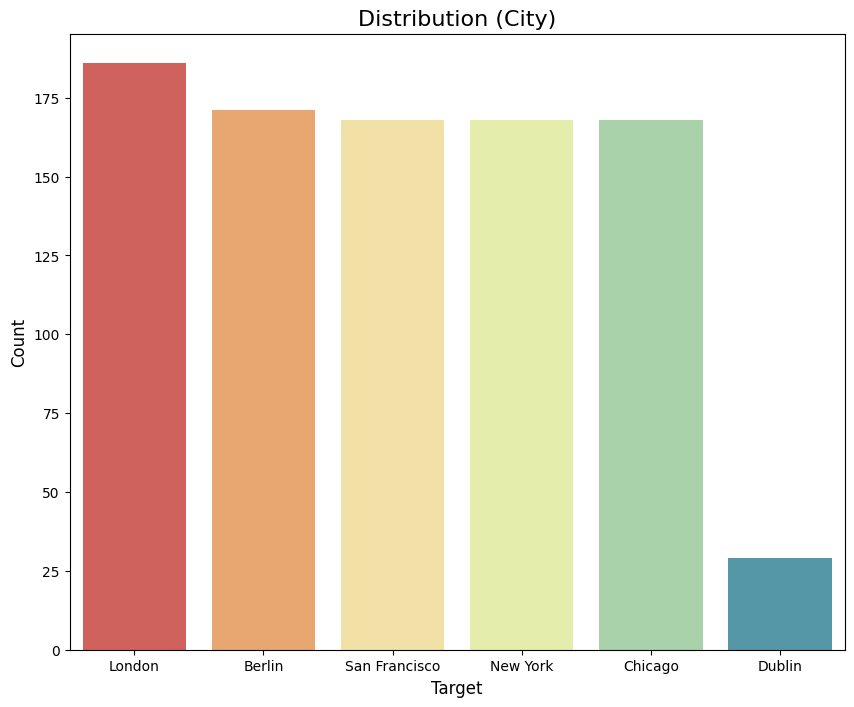

In [28]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['City'],
          colour = 'Spectral',
          title = 'Distribution (City)')

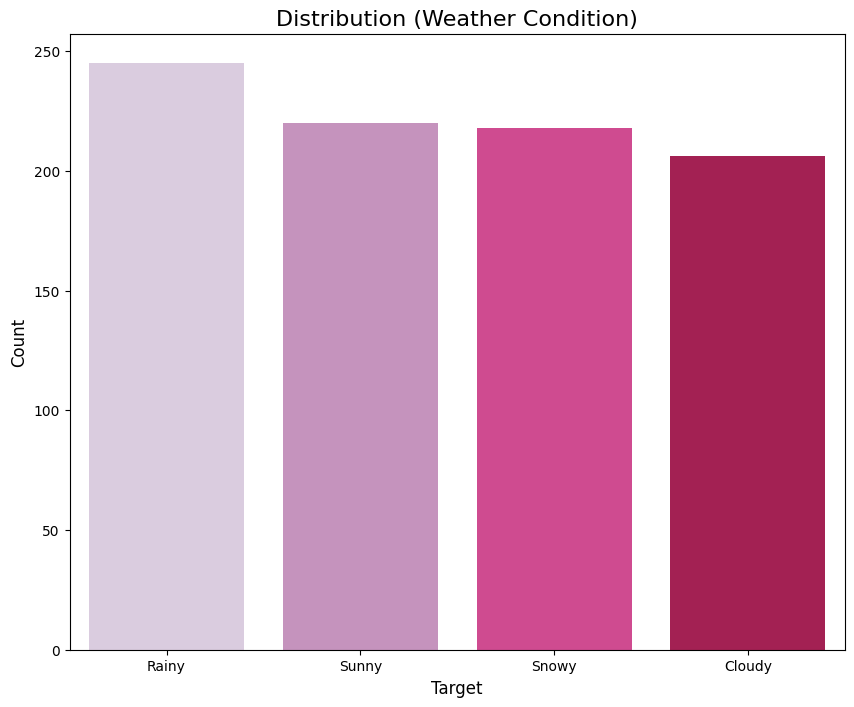

In [29]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['Weather Condition'],
          colour = 'PuRd',
          title = 'Distribution (Weather Condition)')

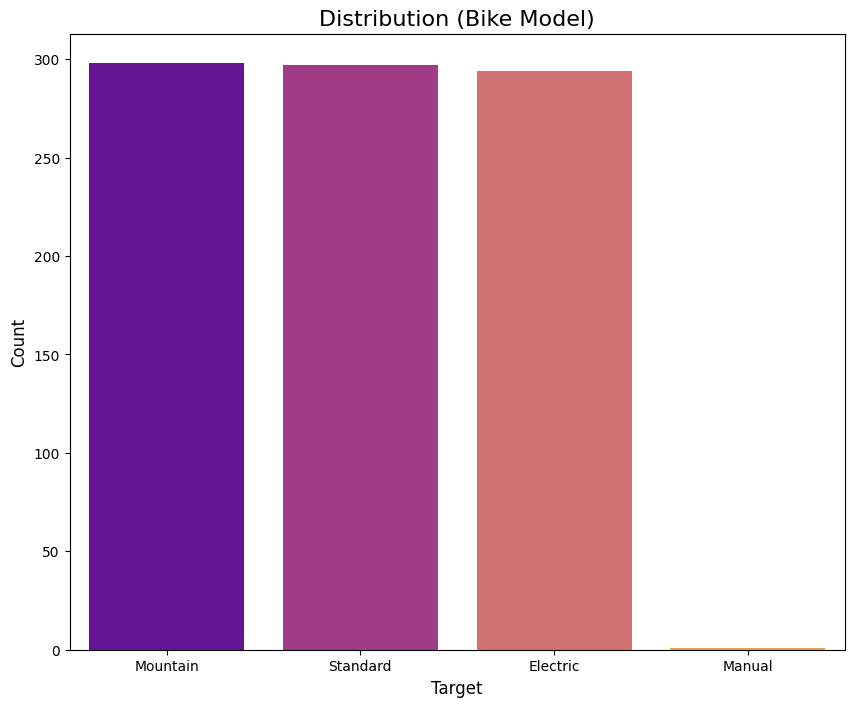

In [30]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['Bike Model'],
          colour = 'plasma',
          title = 'Distribution (Bike Model)')

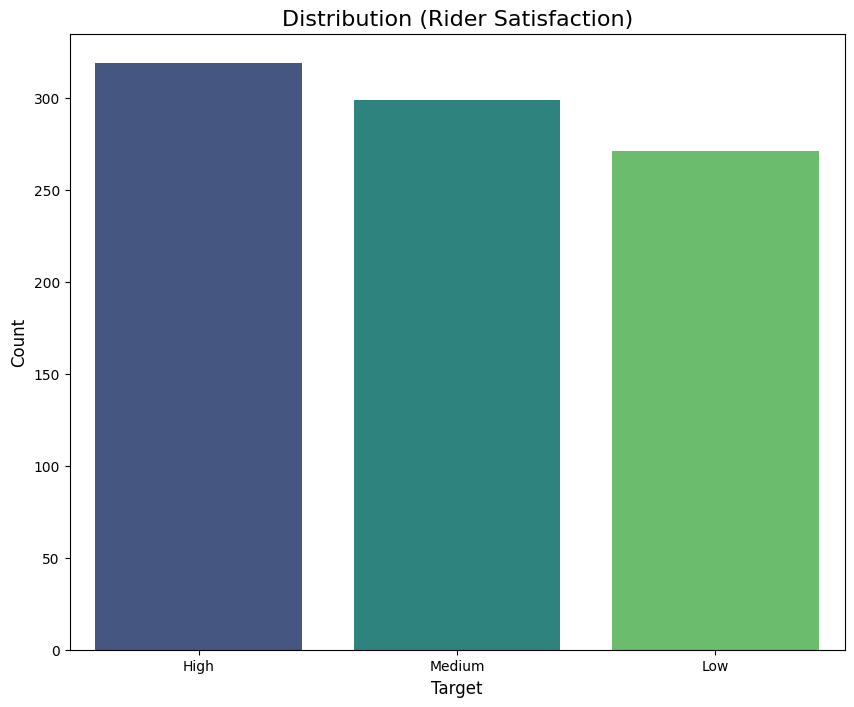

In [31]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['Rider Satisfaction'],
          colour = 'viridis',
          title = 'Distribution (Rider Satisfaction)')

### _**correlation matrix...**_

In [32]:
corr_matrix = visualisations.corr()

corr_matrix

,index,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),City_Berlin,City_Chicago,City_Dublin,City_London,City_New York,...,Bike Model_Manual,Bike Model_Mountain,Bike Model_Standard,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Rider Satisfaction_High,Rider Satisfaction_Low,Rider Satisfaction_Medium
index,1.000000,0.010514,-0.020523,-0.008989,-0.030168,-0.011419,-0.011075,0.056561,0.003591,0.002755,...,-0.019577,0.017811,-0.004952,0.005059,-0.044136,0.032053,0.006399,0.005056,-0.032401,0.035316
Rider Age,0.010514,1.000000,-0.009444,0.008528,0.010464,0.004955,0.012143,0.009409,0.006760,-0.025023,...,-0.000719,-0.066298,-0.001595,0.006580,0.010935,0.052092,-0.073450,-0.002438,-0.022157,0.038404
Ride Duration (min),-0.020523,-0.009444,1.000000,-0.012082,0.912343,-0.006438,-0.038109,0.039431,0.005554,0.017057,...,0.053233,0.027895,-0.072472,0.020315,-0.054317,0.042122,-0.005259,-0.015907,0.006408,0.002661
Distance Covered (km),-0.008989,0.008528,-0.012082,1.000000,-0.034003,-0.003407,-0.023250,0.008738,-0.032315,0.030755,...,0.024626,0.005379,0.019791,0.028628,-0.067986,0.012886,0.028541,-0.007122,0.007269,0.001975
Bike Rental Cost ($),-0.030168,0.010464,0.912343,-0.034003,1.000000,0.009642,-0.017300,0.041952,0.008471,-0.002928,...,0.043099,0.005127,-0.331497,0.002118,-0.054095,0.048668,0.014206,0.004997,-0.008196,-0.002803
City_Berlin,-0.011419,0.004955,-0.006438,-0.003407,0.009642,1.000000,-0.232024,-0.088374,-0.247196,-0.232024,...,0.068863,0.026360,-0.020660,0.005798,-0.035316,-0.002777,0.027680,0.008230,0.021671,-0.040950
City_Chicago,-0.011075,0.012143,-0.038109,-0.023250,-0.017300,-0.232024,1.000000,-0.087416,-0.244516,-0.229508,...,-0.015978,0.002262,-0.020862,0.003711,0.020928,0.002041,-0.033619,-0.033066,0.027434,0.019293
City_Dublin,0.056561,0.009409,0.039431,0.008738,0.041952,-0.088374,-0.087416,1.000000,-0.093132,-0.087416,...,-0.006086,0.032058,-0.007627,-0.024529,0.029764,0.014327,-0.015942,0.009485,-0.010043,-0.008475
City_London,0.003591,0.006760,0.005554,-0.032315,0.008471,-0.247196,-0.244516,-0.093132,1.000000,-0.244516,...,-0.017023,0.049057,-0.019725,-0.036403,-0.003905,0.018873,0.035331,-0.028262,0.041832,-0.010448
City_New York,0.002755,-0.025023,0.017057,0.030755,-0.002928,-0.232024,-0.229508,-0.087416,-0.244516,1.000000,...,-0.015978,-0.058331,0.064041,-0.003077,-0.011105,0.002041,0.012828,0.020587,-0.047160,0.031401


<Axes: >

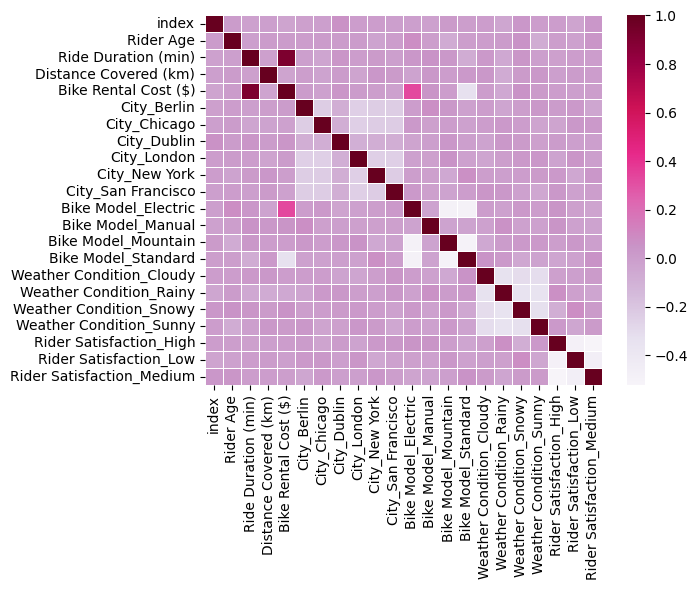

In [33]:
# which is then displayed using seaborn method {heatmap()};

sns.heatmap(corr_matrix,
            cmap = 'PuRd',
            fmt = '.2f',
            linewidths = 0.5)

### _**scatterplots...**_

In [34]:
# a pairplot displaying correlated groupings is generated
# with variable {columns};

#sns.pairplot(visualisations,
 #            hue = 'index',
  #           palette = 'PuRd')

#plt.show()

# **FEATURE ENGINEERING**

### **IMPUTING MISSING CLASSES / VALUES**

In [35]:
df_bikes

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


In [36]:
df_bikes = ONEHOT_ENCODE(dataset = df_bikes,
                         target = ['City',
                                   'Bike Model',
                                   'Rider Satisfaction'],
                                   #'Weather Condition'],
                         datatype = 'int',
                         drop = False)

weather_mapping = {'Sunny': 0,
                   'Cloudy': 1,
                   'Rainy': 2,
                   'Snowy': 3}

#satisfaction_mapping = {'Low': 0,
 #                       'Medium': 1,
  #                      'High': 2}

df_bikes['Weather Condition'] = df_bikes['Weather Condition'].map(weather_mapping)

#df_bikes['Rider Satisfaction'] = df_bikes['Rider Satisfaction'].map(satisfaction_mapping)

df_bikes = df_bikes.rename(columns = {'City_London': 'London',
                                      'City_Berlin': 'Berlin',
                                      'City_Dublin': 'Dublin',
                                      'City_Chicago': 'Chicago',
                                      'City_New York': 'New York',
                                      'City_San Francisco': 'San Francisco',
                                      'Bike Model_Standard': 'Standard Bike',
                                      'Bike Model_Mountain': 'Mountain Bike',
                                      'Bike Model_Electric': 'Electric Bike',
                                      'Bike Model_Manual': 'Manual Bike',
                                      'Rider Satisfaction_Low': 'Not Satisfied',
                                      'Rider Satisfaction_Medium': 'Moderately Satisfied',
                                      'Rider Satisfaction_High': 'Very Satisfied'})

df_bikes

,Weather Condition,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Manual Bike,Mountain Bike,Standard Bike,Very Satisfied,Not Satisfied,Moderately Satisfied
0,2.0,53.0,62.0,2.25,22.63,1,0,0,0,0,0,0,0,0,1,1,0,0
1,1.0,39.0,5.0,21.67,7.87,0,0,0,0,0,1,0,0,0,1,0,0,1
2,0.0,43.0,106.0,28.40,39.40,1,0,0,0,0,0,1,0,0,0,1,0,0
3,1.0,24.0,119.0,5.66,37.63,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0.0,24.0,11.0,25.74,13.12,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2.0,55.0,55.0,28.35,26.30,0,0,0,0,1,0,1,0,0,0,0,0,1
896,1.0,47.0,14.0,11.99,13.78,0,0,0,1,0,0,0,0,1,0,1,0,0
897,0.0,49.0,23.0,2.78,20.47,0,0,0,0,0,1,0,0,1,0,1,0,0
898,0.0,19.0,110.0,2.27,39.62,0,1,0,0,0,0,0,0,1,0,1,0,0


In [37]:
MinMax = MinMaxScaler()

df_impute = pd.DataFrame(MinMax.fit_transform(df_bikes),
                         columns = df_bikes.columns)

In [38]:
imputer = KNNImputer(n_neighbors = 5)

df_impute = pd.DataFrame(imputer.fit_transform(df_impute),
                         columns = df_impute.columns)

In [39]:
df_bikes = pd.DataFrame(MinMax.inverse_transform(df_impute),
                        columns = df_impute.columns)

df_bikes.isna().any()

Weather Condition        False
Rider Age                False
Ride Duration (min)      False
Distance Covered (km)    False
Bike Rental Cost ($)     False
Berlin                   False
Chicago                  False
Dublin                   False
London                   False
New York                 False
San Francisco            False
Electric Bike            False
Manual Bike              False
Mountain Bike            False
Standard Bike            False
Very Satisfied           False
Not Satisfied            False
Moderately Satisfied     False
dtype: bool

In [40]:
#df_bikes['Weather Condition'] = df_bikes['Weather Condition'].astype(int)

#df_bikes['Rider Satisfaction'] = df_bikes['Rider Satisfaction'].astype(int)

### **GROUPING CUSTOMERS BY AGE IN ['Rider Age']**

_the rider age feature will be treated nominally and will be divided into different generations. Certain age groups have a tendency to collectively exhibit unique behaviour largely due to social/cultural/economic experiences and movements relative to their generation (i.e. environmental consciousness, unemployment rates, likliness to pursue academic qualifications etc.). Rider age is more representitive of the particular generational demographic a customer belongs to rather than the implication that a certain behaviour or preference is progressively/regressively affected as age increases..._

In [41]:
# the minimum (youngest) and maximum (oldest) instances
# are first deciphered;

youngest = min(df_bikes['Rider Age'].to_numpy())

oldest = max(df_bikes['Rider Age'].to_numpy())

print(f'Youngest Instance:{youngest}    Oldest Instance:{oldest}')

Youngest Instance:18.0    Oldest Instance:59.99999999999999


In [42]:
# a binning technique will be used to segment
# rider instances within the dataset by age;

bins = [18, 25, 45, 60]

# the feature will be divided into generations rather 
# than individual age instances;

labels = ['Gen Z', 'Millenial', 'Gen X']

In [43]:
# method {pd.cut()} is used to bin the column;

df_bikes['Rider Age'] = pd.cut(df_bikes['Rider Age'], 
                               bins = bins,
                               labels = labels,
                               right = True,
                               include_lowest = True)

print(df_bikes['Rider Age'].value_counts())

Rider Age
Millenial    430
Gen X        316
Gen Z        154
Name: count, dtype: int64


### **CREATING AN INTERACTION FEATURE BETWEEN ['Distance Covered (km)'] AND ['Ride Duration (min)']**

_while these features exhibit a low correlation coefficient value, creating an interaction feature between these columns is worth exploring; correlation doesn't equate to causation and it is likely that a non-linear relationship exists between these features, of which the creation of an interaction feature will afford greater flexibility to a machine learning model to explore..._

In [44]:
# interaction feature {['Distance / Duration']} is created by multiplying 
# features {['Distance Covered (km)']} and {['Ride Duration (min)']};

df_bikes['Distance / Duration'] = df_bikes['Distance Covered (km)'] * df_bikes['Ride Duration (min)']

# the parent features of the interaction feature are then dropped to reduce dimensionality
# and mitigate multi-colinearity;

df_bikes = df_bikes.drop(columns = ['Distance Covered (km)',
                                    'Ride Duration (min)'])

In [45]:
df_bikes

,Weather Condition,Rider Age,Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Manual Bike,Mountain Bike,Standard Bike,Very Satisfied,Not Satisfied,Moderately Satisfied,Distance / Duration
0,2.0,Gen X,22.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,139.50
1,1.0,Millenial,7.87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,108.35
2,0.0,Millenial,39.40,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3010.40
3,1.0,Gen Z,37.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,673.54
4,0.0,Gen Z,13.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,283.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2.0,Gen X,26.30,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1559.25
896,1.0,Gen X,13.78,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,167.86
897,0.0,Gen X,20.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,63.94
898,0.0,Gen Z,39.62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,249.70


### **HANDLING RARE CLASS ['Manual'] IN ['Bike Model']**

_there is only one instance of the manual class in the bike model feature. This class could potentially reveal key insights towards either the regression or classification targets; different feature sets will be created, one omitting this class entirely, and the other wherein this class is synthetically resampled to enable flexibility and experimentation with different datasets within the model fitting phase..._

_class ['Manual'] present in feature ['Bike Model'] is rare with only 1 instance..._

In [46]:
print(df_bikes['Manual Bike'].value_counts())

Manual Bike
0.0    899
1.0      1
Name: count, dtype: int64


_this will be handled by first seperating this class from the DataFrame..._

In [47]:
# the class to seperate is instantiated to {rare_class};

rare_class = 1.0

# pandas filtering is used to isolate this class and remove it from
# {df_bikes} and re-instantiate this updated DataFrame
# to {df_bikes};

df_bikes = df_bikes[df_bikes['Manual Bike'] != rare_class]

df_bikes = df_bikes.drop(columns = ['Manual Bike'])

df_bikes.shape

(899, 16)

In [48]:
df_bikes.head()

,Weather Condition,Rider Age,Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Mountain Bike,Standard Bike,Very Satisfied,Not Satisfied,Moderately Satisfied,Distance / Duration
0,2.0,Gen X,22.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,139.50
1,1.0,Millenial,7.87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,108.35
2,0.0,Millenial,39.40,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3010.40
3,1.0,Gen Z,37.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,673.54
4,0.0,Gen Z,13.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,283.14


# **TRAIN / TEST / SPLIT**

### _**classification sets...**_

- **the task will be treated in a binary manner, this simplifies the problem for a classification model. {low}, and {medium} satisfaction levels will be treated equally as both indicate the potential for customer churn, and will enable the  firm to focus on improving the experience for these customers.**

- **dissatisfied customers are highly likely to churn, and moderately satisfied customers are indifferent. Fostering customer loyalty will be essential to ensure churn rates are minimal going forward.**

In [49]:
help(ONEHOT_ENCODE)

Help on function ONEHOT_ENCODE in module __main__:

ONEHOT_ENCODE(dataset, target, datatype='bool', drop=True)
    .

    ONE-HOT ENCODES AN INPUT TARGET USING
    PANDAS [get_dummies()] METHOD, PARAMETER INPUT
    IS:


    dataset : pandas DataFrame

    target : column name(s) as a list of string value(s)

    datatype : 'bool' or 'int' as a string value

    drop : True or False boolean value

    RECCOMMENDED FOR ONEHOT ENCODING CATEGORICAL
    DATATYPES



In [50]:
# the class to seperate is instantiated to {rare_class};

irrelevant_class = 1.0

# pandas filtering is used to isolate this class and remove it from
# {df_bikes} and re-instantiate this updated DataFrame
# to {df_bikes};

df_bikes = df_bikes[df_bikes['Moderately Satisfied'] != irrelevant_class]

In [51]:
df_bikes

,Weather Condition,Rider Age,Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Mountain Bike,Standard Bike,Very Satisfied,Not Satisfied,Moderately Satisfied,Distance / Duration
0,2.0,Gen X,22.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,139.50
2,0.0,Millenial,39.40,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3010.40
3,1.0,Gen Z,37.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,673.54
4,0.0,Gen Z,13.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,283.14
5,2.0,Gen Z,30.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1779.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,3.0,Gen X,17.39,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,93.66
894,3.0,Gen X,38.59,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1823.78
896,1.0,Gen X,13.78,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,167.86
897,0.0,Gen X,20.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,63.94


In [52]:
# target is sliced from {df_bikes} and instantiated
# to {class_target};

class_target = df_bikes.iloc[:, 12:15]

class_target = class_target.drop(columns = ['Moderately Satisfied',
                                            'Not Satisfied'])

# feature set is created by dropping the target feature 
# from {df_bikes} and instantiating the remaining 
# features to {class_features};

class_features = df_bikes.drop(columns = ['Not Satisfied',
                                          'Moderately Satisfied',
                                          'Very Satisfied'])
                                          #'Distance / Duration'])

# one-hot encode feature and target sets;

# class_target['Rider Satisfaction'] = class_target['Rider Satisfaction'].map(satisfaction_mapping)

class_features = ONEHOT_ENCODE(dataset = class_features,
                               target = [#'Bike Model',
                                         #'Weather Condition',
                                         'Rider Age'],
                               datatype = 'int',
                               drop = False)

# rename columns for interpretability;

class_features = class_features.rename(columns = {#'Bike Model_Electric': 'Electric',
                                                  #'Bike Model_Mountain': 'Mountain',
                                                  #'Bike Model_Standard': 'Standard',
                                                  #'Weather Condition_0': 'Sunny',
                                                  #'Weather Condition_1': 'Cloudy',
                                                  #'Weather Condition_2': 'Rainy',
                                                  #'Weather Condition_3': 'Snowy',
                                                  'Rider Age_Gen Z': 'Gen Z',
                                                  'Rider Age_Millenial': 'Millenial',
                                                  'Rider Age_Gen X': 'Gen X'})

class_target

,Very Satisfied
0,1.0
2,1.0
3,0.0
4,0.0
5,1.0
...,...
893,1.0
894,0.0
896,1.0
897,1.0


In [53]:
class_features

,Weather Condition,Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Mountain Bike,Standard Bike,Distance / Duration,Gen Z,Millenial,Gen X
0,2.0,22.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,139.50,0,0,1
2,0.0,39.40,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3010.40,0,1,0
3,1.0,37.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,673.54,1,0,0
4,0.0,13.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,283.14,1,0,0
5,2.0,30.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1779.28,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,3.0,17.39,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93.66,0,0,1
894,3.0,38.59,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1823.78,0,0,1
896,1.0,13.78,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,167.86,0,0,1
897,0.0,20.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,63.94,0,0,1


### _**regression sets...**_

In [54]:
# target is sliced from {df_bikes} and instantiated
# to {regress_target};

regress_target = df_bikes.iloc[:, 2:3]

                              # column {['Ride Duration (min)']} is
                              # removed due to its obvious and highly
                              # correlated relationship to the target,
                              # enabling the model to provide better
                              # insight towards less blatant predictors;

regress_features = df_bikes.drop(columns = ['Bike Rental Cost ($)', 
                                            'Weather Condition',
                                            #'San Francisco',
                                            #'Chicago',
                                            #'Dublin',
                                            #'Berlin',
                                            #'New York',
                                            #'London',
                                            'Moderately Satisfied',
                                            'Not Satisfied'])
                                            #'Rider Satisfaction'])

# one-hot encode nominal features;

regress_features = ONEHOT_ENCODE(dataset = regress_features,
                                 target = [#'Bike Model',
                                           'Rider Age'],
                                 datatype = 'int',
                                 drop = False)

# rename columns for interpretabilty;

regress_features = regress_features.rename(columns = {#'Bike Model_Electric': 'Electric',
                                                      #'Bike Model_Mountain': 'Mountain',
                                                      #'Bike Model_Standard': 'Standard',
                                                      'Rider Age_Gen Z': 'Gen Z',
                                                      'Rider Age_Millenial': 'Millenial',
                                                      'Rider Age_Gen X': 'Gen X'})

regress_target

,Bike Rental Cost ($)
0,22.63
2,39.40
3,37.63
4,13.12
5,30.61
...,...
893,17.39
894,38.59
896,13.78
897,20.47


In [55]:
regress_features

,Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Mountain Bike,Standard Bike,Very Satisfied,Distance / Duration,Gen Z,Millenial,Gen X
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,139.50,0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3010.40,0,1,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,673.54,1,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,283.14,1,0,0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1779.28,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,93.66,0,0,1
894,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1823.78,0,0,1
896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,167.86,0,0,1
897,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,63.94,0,0,1


### _**classification sets...**_

_**75 / 25**_

In [56]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {class_features} and {class_target} as input;

(class_X_train75,
 class_X_test25, 
 class_y_train75,
 class_y_test25) = train_test_split(class_features,
                                    class_target,
                                    random_state = 42,
                                    test_size = 0.25)
                                                    
                                    # ensure each unique class
                                    # from target is present
                                    # in the class target split set;
                                                                                                                        
                                    # stratify = class_target)

_**90 / 10**_

In [57]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 90 / 10 split ratio passing
# {class_features} and {class_target} as input;

(class_X_train90,
 class_X_test10, 
 class_y_train90,
 class_y_test10) = train_test_split(class_features,
                                    class_target,
                                    random_state = 42,
                                    test_size = 0.10)
                                                    
                                    # ensure each unique class is present
                                    # in the class target split set;
                                                                                                                        
                                    # stratify = class_target)

### _**regression sets...**_

_**75 / 25**_

In [58]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {regress_features} and {regress_target} as input;

(regress_X_train75,
 regress_X_test25, 
 regress_y_train75,
 regress_y_test25) = train_test_split(regress_features,
                                      regress_target,
                                      random_state = 42,
                                      test_size = 0.25)
                                
                                      # stratification is not necessary for
                                      # regression split sets

_**90 / 10**_

In [59]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {regress_features} and {regress_target} as input;

(regress_X_train90, 
 regress_X_test10,
 regress_y_train90, 
 regress_y_test10) = train_test_split(regress_features,
                                      regress_target,
                                      random_state = 42,
                                      test_size = 0.10)
                                
                                      # stratification is not necessary for
                                      # regression split sets

# **CLASS IMBALANCE HANDLING**

#### _only train sets will be resampled. Resampling test sets would result in poor model evaluation. A properly trained ml model will be capable of generalising well to unseen data regardless of any class imbalances that may be present within a test set..._

#### _instantiating resampler objects..._

In [60]:
# various sampling strategies are used and evaluated by instantiating 
# {RandomUnderSampler(), RandomOverSampler(), and SMOTE()} sampler objects
# from the imblearn library;

rus = RandomUnderSampler(sampling_strategy = 'not minority')

ros = RandomOverSampler(sampling_strategy = 'not majority')

smote = SMOTE(sampling_strategy = 'not majority', 
              random_state = 42,
              k_neighbors = 6)

- _**it was found through experimenting with each resampling methodology, that SMOTE resulted in the most reliable results**_
- _**the random undersampler object drastically reduced the cardinality of the overall dataset**_
- _**the random oversampler object increased overfitting due to its nature of simply copying instances rather than synthetically recreating new ones akin to the SMOTE strategy**_

### _**classification sets...**_

_**75 / 25**_

#### _distriution of unbalanced columns before resampling..._

<Axes: ylabel='count'>

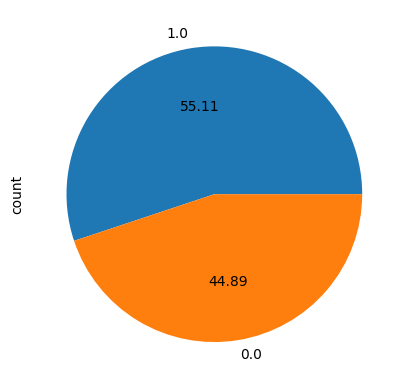

In [61]:
class_y_train75['Very Satisfied'].value_counts().plot.pie(autopct = '%.2f')

In [62]:
# imbalanced features are now label encoded;

#class_X_train75['City'] = class_X_train75['City'].map(city_mapping)

# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

class_resample75 = pd.concat([class_X_train75, class_y_train75],
                              axis = 1)

# {X} and {y} are then fit to the {RandomOverSampler()} object {ros}

X, y = smote.fit_resample(class_resample75.drop(columns = ['Very Satisfied']),
                          class_resample75['Very Satisfied'])

# a new {resample} dataset is created by concatenation {X} and {y}...

class_resample75 = pd.concat([X, y],
                             axis = 1)

#### _distriution of unbalanced columns after resampling..._

<Axes: ylabel='count'>

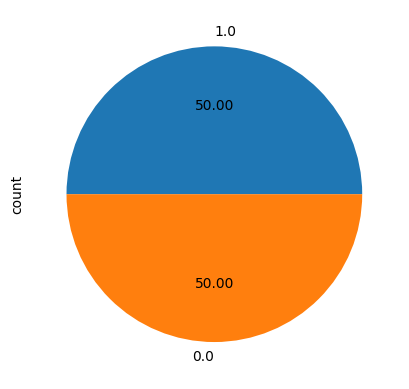

In [63]:
class_resample75['Very Satisfied'].value_counts().plot.pie(autopct = '%.2f')

In [64]:
class_resample75

,Weather Condition,Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Mountain Bike,Standard Bike,Distance / Duration,Gen Z,Millenial,Gen X,Very Satisfied
0,0.000000,36.190000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,2449.920000,0,0,1,1.0
1,1.000000,30.194000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,1798.720000,0,1,0,0.0
2,3.000000,9.460000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,444.780000,0,1,0,0.0
3,2.000000,16.740000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,27.440000,0,0,1,1.0
4,2.000000,12.590000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,190.500000,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2.073699,19.098498,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,437.005576,0,0,0,0.0
492,1.651077,19.084514,0.348923,0.000000,0.0,0.651077,0.000000,0.0,0.348923,0.000000,0.651077,240.635409,0,0,0,0.0
493,2.829919,41.259963,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.914960,0.085040,3779.976098,0,0,0,0.0
494,0.000000,18.865755,0.000000,0.149961,0.0,0.000000,0.850039,0.0,0.000000,0.850039,0.149961,643.047745,0,0,0,0.0


In [65]:
# split resampled data into features and target;

class_X_train75 = class_resample75.drop(columns = ['Very Satisfied'])
class_y_train75 = class_resample75.iloc[:, 15:16]

# ensure feature ordering is matched between train and test sets;

class_X_test25 = class_X_test25[class_X_train75.columns]

_**90 / 10**_

#### _distriution of unbalanced columns before resampling..._

<Axes: ylabel='count'>

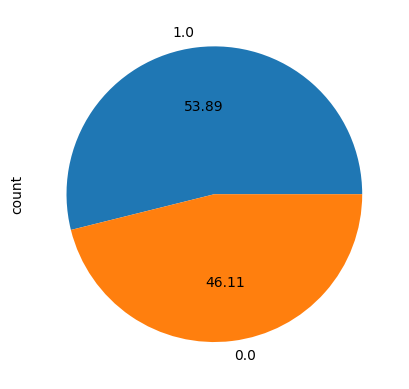

In [66]:
class_y_train90['Very Satisfied'].value_counts().plot.pie(autopct = '%.2f')

In [67]:
# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

class_resample90 = pd.concat([class_X_train90, class_y_train90],
                             axis = 1)

# {X} and {y} are then fit to the {RandomOverSampler()} object {ros}

X, y = ros.fit_resample(class_resample90.drop(columns = ['Very Satisfied']),
                        class_resample90['Very Satisfied'])

# a new {resample} dataset is created by concatenation {X} and {y}...

class_resample90 = pd.concat([X, y],
                             axis = 1)

#### _distriution of unbalanced columns after resampling..._

<Axes: ylabel='count'>

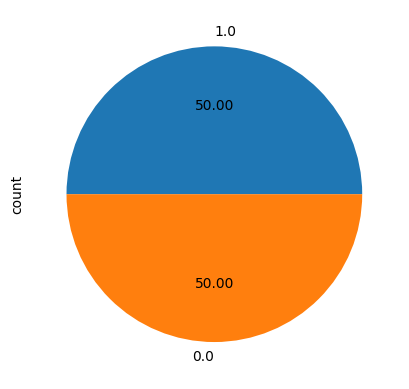

In [68]:
class_resample90['Very Satisfied'].value_counts().plot.pie(autopct = '%.2f')

In [69]:
class_resample90

,Weather Condition,Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric Bike,Mountain Bike,Standard Bike,Distance / Duration,Gen Z,Millenial,Gen X,Very Satisfied
0,3.0,26.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1339.65,0,0,1,1.0
1,1.0,25.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1578.06,0,0,1,1.0
2,0.0,25.39,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,439.53,0,0,1,1.0
3,3.0,13.13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,496.21,0,0,1,0.0
4,1.0,38.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1809.05,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,2.0,27.81,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,83.79,0,1,0,0.0
578,2.0,33.86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1268.50,0,0,1,0.0
579,1.0,22.18,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1089.60,0,1,0,0.0
580,2.0,24.52,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,723.24,0,0,1,0.0


In [70]:
# split resampled data into features and target;

class_X_train90 = class_resample90.drop(columns = ['Very Satisfied'])
class_y_train90 = class_resample90.iloc[:, 15:16]

# ensure feature ordering is matched between train and test sets;

class_X_test10 = class_X_test10[class_X_train90.columns]

# **STANDARDISATION**

#### _instantiating Scaler object..._

In [71]:
scaler = RobustScaler()

## **FITTING FEATURE SETS TO STANDARD SCALER OBJECT**

### _**regression sets...**_

**_75 / 25_**

In [72]:
regress_X_train75 = pd.DataFrame(scaler.fit_transform(regress_X_train75),
                                 columns = regress_X_train75.columns)

regress_X_test25 = pd.DataFrame(scaler.transform(regress_X_test25),
                                columns = regress_X_test25.columns)

**_90 / 10_**

In [73]:
regress_X_train90 = pd.DataFrame(scaler.fit_transform(regress_X_train90),
                                 columns = regress_X_train90.columns)

regress_X_test10 = pd.DataFrame(scaler.transform(regress_X_test10),
                                columns = regress_X_test10.columns)

### _**classification sets...**_

**_75 / 25_**

In [74]:
class_X_train75 = pd.DataFrame(scaler.fit_transform(class_X_train75),
                               columns = class_X_train75.columns)

class_X_test25 = pd.DataFrame(scaler.transform(class_X_test25),
                              columns = class_X_test25.columns)

**_90 / 10_**

In [75]:
class_X_train90 = pd.DataFrame(scaler.fit_transform(class_X_train90),
                               columns = class_X_train90.columns)

class_X_test10 = pd.DataFrame(scaler.transform(class_X_test10),
                              columns = class_X_test10.columns)

# **LOGISTIC REGRESSION FOR CUSTOMER CHURN**

#### _**model instantiation...**_

In [76]:
LogR = LogisticRegression(C = 1,
                          random_state = 42,
                          penalty = 'l2',                 # Regularization strength
                          solver = 'liblinear',         # Optimization solver
                          max_iter = 500,
                          class_weight = 'balanced')

#### **_75 / 25_**

_fitting the model..._

In [77]:
LogR.fit(class_X_train75, 
         class_y_train75)

LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=42,
                   solver='liblinear')

_evaluating the model..._

In [78]:
# predict on the test set utilising the Random Forest Classifier model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = LogR.predict(class_X_test25)

y_test = class_y_test25

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.40      0.45        80
         1.0       0.45      0.57      0.51        70

    accuracy                           0.48       150
   macro avg       0.49      0.49      0.48       150
weighted avg       0.49      0.48      0.48       150



In [79]:
# overall accuracy is displayed by first 
# instantiating {accuracy_score} value to 
# {accuracy}...

accuracy = accuracy_score(y_test, 
                          y_pred)

# which is then printed;

print(accuracy)

0.48


In [80]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

LogR_results = {'Actual Values': list(y_test),
               'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(LogR_results)

df_results

,Actual Values,Predicted Values
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
145,0.0,0.0
146,0.0,1.0
147,0.0,0.0
148,0.0,1.0


In [81]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



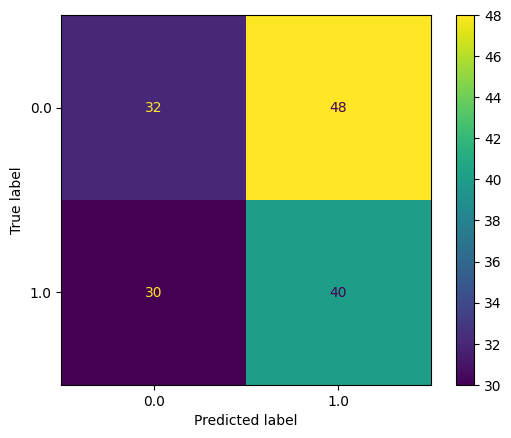

In [82]:
CONFUSION(df_results)

_10 fold cross validation_

In [83]:
# precision score is instantiated to {precision};

precision = precision_score(class_y_test25,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(class_y_test25, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(LogR, 
                               class_X_train75,
                               class_y_train75, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(LogR,
                            class_X_train75,
                            class_y_train75,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5335282278797295
recall: 0.5969942939508157


_hyperparameter optimisation..._

In [84]:
        # regularization type;

grid = {'penalty': ['none', 'l1', 'l2', 'elasticnet'], 

        # inverse regularization strength;
        
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],

        # optimization algorithms;
        
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga', 'sag'],  

        # maximum number of iterations for convergence;
        
        'max_iter': [50, 100, 200, 500, 1000],   

        # tolerance for stopping criteria;
        
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],      

        # class weighting;
        
        'class_weight': [None, 'balanced', {0: 0.5, 1: 1.5}, {0: 1.5, 1: 0.5}],  

        # l1 ratio;
        
        'l1_ratio': [None, 0.1, 0.25, 0.5, 0.75, 0.9],

        # include intercept or not;
        
        'fit_intercept': [True, False],    

        # dual or primal formulation;
        
        'dual': [False, True],       

        # reuse previous solution as initialization;
        
        'warm_start': [True, False]}

random_search = RandomizedSearchCV(estimator = LogR, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,           

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',       

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 125)

start = t.time()

random_search.fit(class_X_train75, 
                  class_y_train75)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
Best Hyperparameters Found: {'warm_start': True, 'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'l1_ratio': 0.1, 'fit_intercept': True, 'dual': False, 'class_weight': None, 'C': 10} in: 7.028366804122925 Seconds


In [181]:
# optimal parameters are also manually instantiated to the model;

LogR = LogisticRegression(warm_start = True,
                          tol = 0.0001,
                          solver = 'liblinear',
                          penalty = 'l2',
                          max_iter = 200,
                          l1_ratio = 0.1,
                          fit_intercept = True,
                          dual = False,
                          class_weight = None,
                          C = 10)

In [85]:
# Predict using the best model from GridSearchCV

y_test = (class_y_test25)

y_pred = random_search.predict(class_X_test25)

In [86]:
# Evaluate the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.38      0.43        80
         1.0       0.45      0.59      0.51        70

    accuracy                           0.47       150
   macro avg       0.48      0.48      0.47       150
weighted avg       0.48      0.47      0.47       150



In [87]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

LogR_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(LogR_results)

df_results

,Actual Values,Predicted Values
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
145,0.0,0.0
146,0.0,1.0
147,0.0,0.0
148,0.0,1.0


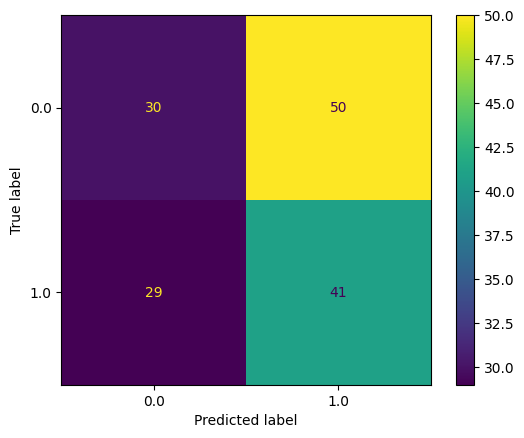

In [88]:
CONFUSION(df_results)

_10 fold cross validation_

In [89]:
# precision score is instantiated to {precision};

precision = precision_score(y_test,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(y_test, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(LogR, 
                               class_X_train75,
                               class_y_train75, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(LogR,
                            class_X_train75,
                            class_y_train75,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5335282278797295
recall: 0.5969942939508157


#### **_90 / 10_**

_fitting the model..._

In [90]:
LogR.fit(class_X_train90, 
        class_y_train90)

LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=42,
                   solver='liblinear')

_evaluating the model..._

In [91]:
# predict on the test set utilising the Logistic Regression model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = LogR.predict(class_X_test10)

y_test = class_y_test10

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.48      0.50        33
         1.0       0.41      0.44      0.43        27

    accuracy                           0.47        60
   macro avg       0.46      0.46      0.46        60
weighted avg       0.47      0.47      0.47        60



In [92]:
# overall accuracy is displayed by first 
# instantiating {accuracy_score} value to 
# {accuracy}...

accuracy = accuracy_score(y_test, 
                          y_pred)

# which is then printed;

print(accuracy)

0.4666666666666667


In [93]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

LogR_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(LogR_results)

df_results

,Actual Values,Predicted Values
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
5,1.0,0.0
6,0.0,0.0
7,0.0,0.0
8,1.0,0.0
9,1.0,1.0


In [94]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



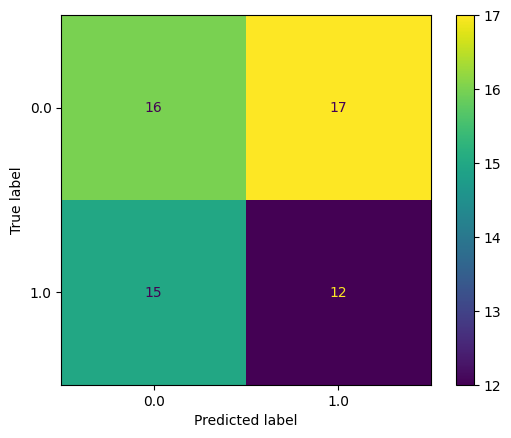

In [95]:
CONFUSION(df_results)

_10 fold cross validation_

In [96]:
# precision score is instantiated to {precision};

precision = precision_score(class_y_test10,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(class_y_test10, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(LogR, 
                               class_X_train90,
                               class_y_train90, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(LogR,
                            class_X_train90,
                            class_y_train90,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5275114149914291
recall: 0.5384609069091828


_hyperparameter optimisation..._

In [97]:
        # regularization type;

grid = {'penalty': ['none', 'l1', 'l2', 'elasticnet'],

        # inverse regularization strength;
        
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  

        # optimization algorithms;
        
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga', 'sag'], 

        # maximum number of iterations for convergence;
        
        'max_iter': [50, 100, 200, 500, 1000],    

        # tolerance for stopping criteria;
        
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],        

        # class weighting;
        
        'class_weight': [None, 'balanced', {0: 0.5, 1: 1.5}, {0: 1.5, 1: 0.5}],  

        # l1 ratio;
        
        'l1_ratio': [None, 0.1, 0.25, 0.5, 0.75, 0.9],  

        # include intercept or not;
        
        'fit_intercept': [True, False],     

        # dual or primal formulation;
        
        'dual': [False, True],           

        # reuse previous solution as initialization;
        
        'warm_start': [True, False]}                         

random_search = RandomizedSearchCV(estimator = LogR, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,            

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',        

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 125)

start = t.time()

random_search.fit(class_X_train90, 
                  class_y_train90)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
Best Hyperparameters Found: {'warm_start': True, 'tol': 1e-05, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 1000, 'l1_ratio': 0.5, 'fit_intercept': True, 'dual': False, 'class_weight': 'balanced', 'C': 0.1} in: 2.780566453933716 Seconds


In [182]:
# optimal parameters are also manually instantiated to the model;

LogR = LogisticRegression(warm_start = True,
                          tol = 1e-05,
                          solver = 'saga',
                          penalty = 'elasticnet',
                          max_iter = 1000,
                          l1_ratio = 0.5,
                          fit_intercept = True,
                          dual = False,
                          class_weight = 'balanced',
                          C = 0.1)

In [98]:
# Predict using the best model from GridSearchCV

y_test = class_y_test10

y_pred = random_search.predict(class_X_test10)

In [99]:
# Evaluate the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53        33
         1.0       0.40      0.37      0.38        27

    accuracy                           0.47        60
   macro avg       0.46      0.46      0.46        60
weighted avg       0.46      0.47      0.46        60



In [100]:
# overall accuracy is displayed by first 
# instantiating {accuracy_score} value to 
# {accuracy}...

accuracy = accuracy_score(y_test, 
                          y_pred)

# which is then printed;

print(accuracy)

0.4666666666666667


In [101]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

LogR_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(LogR_results)

df_results

,Actual Values,Predicted Values
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
5,1.0,0.0
6,0.0,0.0
7,0.0,0.0
8,1.0,1.0
9,1.0,1.0


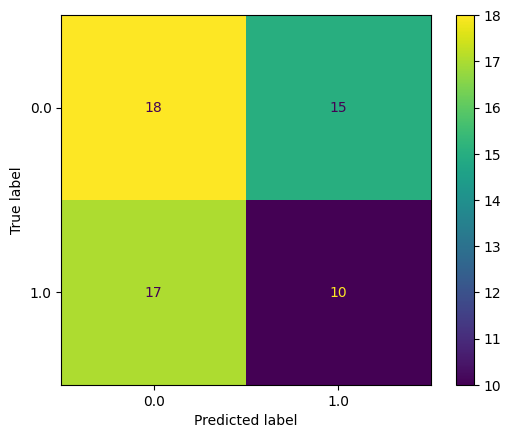

In [102]:
CONFUSION(df_results)

_10 fold cross validation_

In [103]:
# precision score is instantiated to {precision};

precision = precision_score(class_y_test10,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(class_y_test10, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(LogR, 
                               class_X_train90,
                               class_y_train90, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(LogR,
                            class_X_train90,
                            class_y_train90,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5275114149914291
recall: 0.5384609069091828


# **XGB CLASSIFIER FOR CUSTOMER CHURN**

#### _**model instantiation...**_

In [104]:
XGBC = XGBClassifier(random_state = 42)

#### _**75 / 25**_

_fitting the model..._

In [105]:
XGBC.fit(class_X_train75, 
         class_y_train75)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

_evaluating the model..._

In [106]:
# predict on the test set utilising the Random Forest Classifier model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = XGBC.predict(class_X_test25)

y_test = class_y_test25

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.41      0.46        80
         1.0       0.47      0.59      0.52        70

    accuracy                           0.49       150
   macro avg       0.50      0.50      0.49       150
weighted avg       0.50      0.49      0.49       150



In [107]:
# overall accuracy is displayed by first 
# instantiating {accuracy_score} value to 
# {accuracy}...

accuracy = accuracy_score(y_test, 
                          y_pred)

# which is then printed;

print(accuracy)

0.49333333333333335


In [108]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

XGBC_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(XGBC_results)

df_results

,Actual Values,Predicted Values
0,0.0,1
1,0.0,0
2,1.0,0
3,1.0,0
4,0.0,0
...,...,...
145,0.0,1
146,0.0,1
147,0.0,0
148,0.0,1


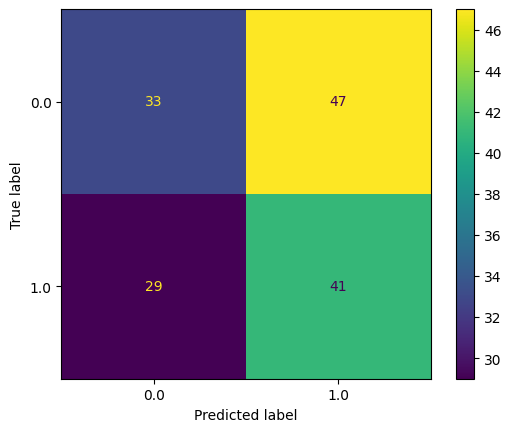

In [109]:
CONFUSION(df_results)

_10 fold cross validation_

In [110]:
# precision score is instantiated to {precision};

precision = precision_score(class_y_test25,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(class_y_test25, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(XGBC, 
                               class_X_train75,
                               class_y_train75, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(XGBC,
                            class_X_train75,
                            class_y_train75,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5572167623664901
recall: 0.5768061407191842


_hyperparameter optimisation..._

In [111]:
        # number of trees;

grid = {'n_estimators': [50, 100, 150],  

        # learning rate;

        'learning_rate': [0.01, 0.1, 0.3], 

        # maximum tree depth;
        
        'max_depth': [2, 15],          

        # minimum sum of weights for child nodes;
        
        'min_child_weight': [1, 3, 7, 10],   

        # minimum loss reduction to make a split;
        
        'gamma': [0, 0.05, 0.3],       

        # fraction of features for each tree;
        
        'colsample_bytree': [0.5, 0.7, 1],      

        # fraction of features per level;
        
        'colsample_bylevel': [0.5, 0.7, 1],   

        # fraction of features per node;
        
        'colsample_bynode': [0.5, 0.7, 1],   

        # fraction of data used per iteration;
        
        'subsample': [0.5, 0.7, 1],           

        # random state for reproducibility;
        
        'random_state': [42],              

        # tree growth policy;
        
        'grow_policy': ['depthwise', 'lossguide'],  

        # max number of bins for numerical features;
        
        'max_bin': [64, 128, 256],        

        # maximum number of leaves in trees;
        
        'max_leaves': [0, 50, 100],   

        # early stopping rounds;
        
        'early_stopping_rounds': [10, 20, None],    

        # booster methodology;
        
        'booster': ['gbtree', 'dart']}

random_search = RandomizedSearchCV(estimator = XGBC, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,       

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',   

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 50)

start = t.time()

random_search.fit(class_X_train75, 
                  class_y_train75)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters Found: {'subsample': 0.5, 'random_state': 42, 'n_estimators': 50, 'min_child_weight': 1, 'max_leaves': 100, 'max_depth': 15, 'max_bin': 256, 'learning_rate': 0.3, 'grow_policy': 'lossguide', 'gamma': 0.05, 'early_stopping_rounds': None, 'colsample_bytree': 1, 'colsample_bynode': 0.5, 'colsample_bylevel': 0.7, 'booster': 'dart'} in: 24.20998477935791 Seconds


In [183]:
# optimal parameters are also manually instantiated to the model;

XGBC = XGBClassifier(subsample = 0.5,
                     random_state = 42,
                     n_estimators = 50,
                     min_child_weight = 1,
                     max_leaves = 100,
                     max_depth = 15,
                     max_bin = 256,
                     learning_rate = 0.3,
                     grow_policy = 'lossguide',
                     gamma = 0.05,
                     early_stopping_rounds = None,
                     colsample_bytree = 1,
                     colsample_bynode = 0.5,
                     colsample_bylevel = 0.7,
                     booster = 'dart')

In [112]:
# Predict using the best model from RandomizedSearchCV

y_test = class_y_test25

y_pred = random_search.predict(class_X_test25)

In [113]:
# Evaluate the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.44      0.35      0.39        80
         1.0       0.40      0.50      0.45        70

    accuracy                           0.42       150
   macro avg       0.42      0.42      0.42       150
weighted avg       0.42      0.42      0.42       150



In [114]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

XGBC_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(XGBC_results)

df_results

,Actual Values,Predicted Values
0,0.0,1
1,0.0,0
2,1.0,0
3,1.0,1
4,0.0,0
...,...,...
145,0.0,1
146,0.0,1
147,0.0,0
148,0.0,1


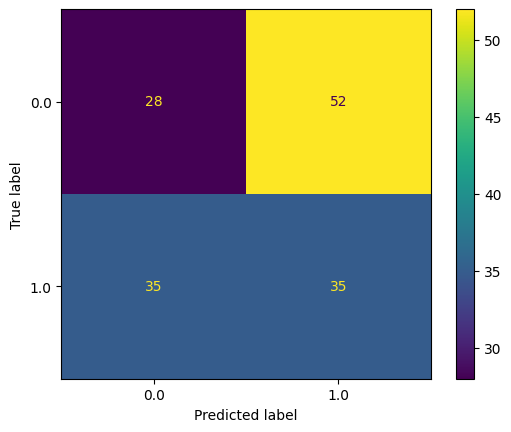

In [115]:
CONFUSION(df_results)

_10 fold cross validation_

In [116]:
# precision score is instantiated to {precision};

precision = precision_score(y_test,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(y_test, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(XGBC, 
                               class_X_train75,
                               class_y_train75, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(XGBC,
                            class_X_train75,
                            class_y_train75,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5572167623664901
recall: 0.5768061407191842


#### _**90 / 10**_

_fitting the model..._

In [117]:
XGBC.fit(class_X_train90, 
         class_y_train90)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

_evaluating the model..._

In [118]:
# predict on the test set utilising the Random Forest Classifier model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = XGBC.predict(class_X_test10)

y_test = class_y_test10

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52        33
         1.0       0.47      0.56      0.51        27

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.52        60
weighted avg       0.53      0.52      0.52        60



In [119]:
# overall accuracy is displayed by first 
# instantiating {accuracy_score} value to 
# {accuracy}...

accuracy = accuracy_score(y_test, 
                          y_pred)

# which is then printed;

print(accuracy)

0.5166666666666667


In [120]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

XGBC_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(XGBC_results)

df_results

,Actual Values,Predicted Values
0,0.0,1
1,0.0,0
2,1.0,0
3,1.0,0
4,0.0,0
5,1.0,0
6,0.0,0
7,0.0,0
8,1.0,0
9,1.0,1


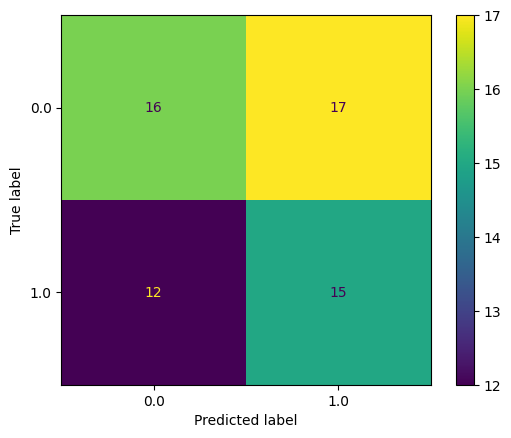

In [121]:
CONFUSION(df_results)

_10 fold cross validation_

In [122]:
# precision score is instantiated to {precision};

precision = precision_score(class_y_test10,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(class_y_test10, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(XGBC, 
                               class_X_train90,
                               class_y_train90, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(XGBC,
                            class_X_train90,
                            class_y_train90,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5316279461279462
recall: 0.505340406719717


_hyperparameter optimisation..._

In [123]:
        # number of trees;

grid = {'n_estimators': [50, 100, 150],  

        # learning rate;
        
        'learning_rate': [0.01, 0.1, 0.3], 

        # maximum tree depth;
        
        'max_depth': [2, 15],      

        # minimum sum of weights for child nodes;
        
        'min_child_weight': [1, 3, 7, 10],         

        # minimum loss reduction to make a split;
        
        'gamma': [0, 0.05, 0.3],            

        # fraction of features for each tree;
        
        'colsample_bytree': [0.5, 0.7, 1],      

        # fraction of features per level;
        
        'colsample_bylevel': [0.5, 0.7, 1],     

        # fraction of features per node;
        
        'colsample_bynode': [0.5, 0.7, 1],      

        # fraction of data used per iteration;
        
        'subsample': [0.5, 0.7, 1],     

        # random state for reproducibility;
        
        'random_state': [42],            

        # tree growth policy;
        
        'grow_policy': ['depthwise', 'lossguide'],  

        # max number of bins for numerical features;
        
        'max_bin': [64, 128, 256],    

        # maximum number of leaves in trees;
        
        'max_leaves': [0, 50, 100],            

        # early stopping rounds;
        
        'early_stopping_rounds': [10, 20, None],   

        # booster methodology;
        
        'booster': ['gbtree', 'dart']}

random_search = RandomizedSearchCV(estimator = XGBC, 
                                   param_distributions = grid,

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,             

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',      

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 50)

start = t.time()

random_search.fit(class_X_train90, 
                  class_y_train90)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters Found: {'subsample': 1, 'random_state': 42, 'n_estimators': 150, 'min_child_weight': 1, 'max_leaves': 50, 'max_depth': 15, 'max_bin': 64, 'learning_rate': 0.1, 'grow_policy': 'depthwise', 'gamma': 0.05, 'early_stopping_rounds': None, 'colsample_bytree': 1, 'colsample_bynode': 0.5, 'colsample_bylevel': 0.5, 'booster': 'dart'} in: 31.2644202709198 Seconds


In [124]:
# predict using the best model from RandomizedSearchCV;

y_test = class_y_test25

y_pred = random_search.predict(class_X_test25)

In [184]:
# optimal parameters are also manually instantiated to the model;

XGBC = XGBClassifier(subsample = 1, 
                     random_state = 42,
                     n_estimators = 150, 
                     min_child_weight = 1,
                     max_leaves = 50,
                     max_depth = 15,
                     max_bin = 64, 
                     learning_rate = 0.1,
                     grow_policy = 'depthwise',
                     gamma = 0.05,
                     early_stopping_rounds = None,
                     colsample_bytree = 1, 
                     colsample_bynode = 0.5,
                     colsample_bylevel = 0.5,
                     booster = 'dart')

In [125]:
# Evaluate the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75        80
         1.0       0.71      0.76      0.73        70

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150



In [126]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

XGBC_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(XGBC_results)

df_results

,Actual Values,Predicted Values
0,0.0,1
1,0.0,0
2,1.0,1
3,1.0,0
4,0.0,0
...,...,...
145,0.0,1
146,0.0,1
147,0.0,0
148,0.0,0


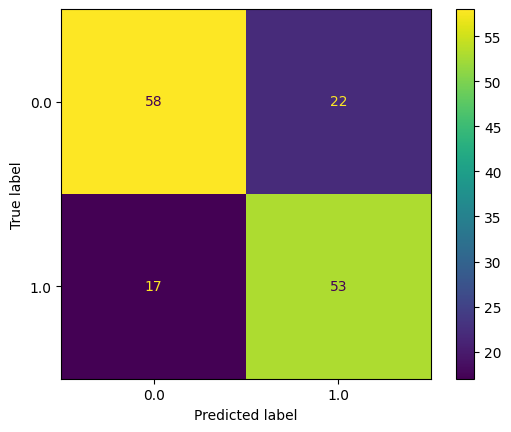

In [127]:
CONFUSION(df_results)

_10 fold cross validation_

In [128]:
# precision score is instantiated to {precision};

precision = precision_score(y_test,
                            y_pred)

# recall score is instantiated to {recall};

recall = recall_score(y_test, 
                      y_pred)

# scorers to evaluate cross validated test
# results are created and instantiated to 
# {precision_scorer} and {recall_scorer};

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# cross validation sets are then used to evaluate each 
# metric seperately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

precision_cv = cross_val_score(XGBC, 
                               class_X_train90,
                               class_y_train90, 
                               cv = kf, 
                               scoring = precision_scorer)

recall_cv = cross_val_score(XGBC,
                            class_X_train90,
                            class_y_train90,
                            cv = kf, 
                            scoring = recall_scorer)

# ...and results are printed;

res = f''' precision: {precision_cv.mean()}
recall: {recall_cv.mean()}'''

print(res)

 precision: 0.5316279461279462
recall: 0.505340406719717


# **RESULTS:**

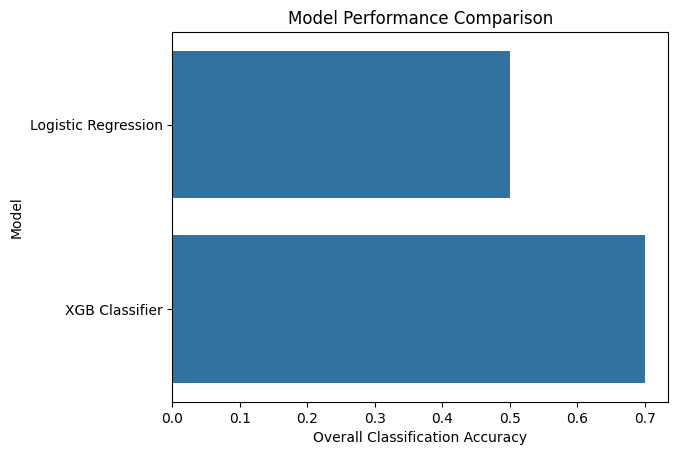

In [213]:
performance_data = {'Model': ['Logistic Regression', 
                              'XGB Classifier'],
                    'Overall Classification Accuracy': [0.50, 0.70]}

df_performance = pd.DataFrame(performance_data)

sns.barplot(x = 'Overall Classification Accuracy',
            y = 'Model', 
            data = df_performance)

plt.title('Model Performance Comparison')
plt.show()

- Logistic regression outperforms XGB Classifier in terms of computational efficiency
- However, in this instance XGB Classifier greatly outperformed Logistic Regression in terms of accuracy, indicating that the relationships between dependent and independent variables are inherently nonlinear, as the Logistic Regression model struggled to capture the complex relationships between them, and instead either overfit to one class over the other or underfit entirely and failed to generalise to the problem

# **LINEAR REGRESSION FOR CUSTOMER EXPENSE**

#### _**model instantiation...**_

In [129]:
LinR = LinearRegression()

#### _**75 / 25**_

_fitting the model..._

In [130]:
LinR.fit(regress_X_train75,
         regress_y_train75)

LinearRegression()

_evaluating the model..._

In [131]:
# predict on the test set utilising the Random Forest Classifier model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = LinR.predict(regress_X_test25)

y_test = regress_y_test25

# evaluate performance;

r2 = r2_score(y_test,
              y_pred)

mae = mean_absolute_error(y_test,
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.5016020507236176
Mean Absolute Error:5.249672583931732
Mean Squared Error:41.52597861237599


_10 fold cross validation_

In [133]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(LinR,
                         regress_X_train75,
                         regress_y_train75,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(LinR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 53.19102428290462
Mean Absolute Error: 5.9054661434615365


_hyperparameter optimisation..._

In [140]:
        # whether to normalize the features;

grid = {'fit_intercept': [True, False],  

        # whether to constrain coefficients to be positive;
        
        'positive': [True, False]}           

random_search = RandomizedSearchCV(estimator = LinR, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,       

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 50)

start = t.time()

random_search.fit(regress_X_train75, 
                  regress_y_train75)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters Found: {'positive': True, 'fit_intercept': True} in: 5.299048662185669 Seconds


In [185]:
# optimal parameters are also manually instantiated to the model;

LinR = LinearRegression(positive = True,
                        fit_intercept = True)

In [141]:
# predict using the best model from RandomSearchCV;

y_test = regress_y_test25

y_pred = random_search.predict(regress_X_test25)

r2 = r2_score(y_test, 
              y_pred)

mae = mean_absolute_error(y_test, 
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.5072482530484577
Mean Absolute Error:5.2426732128997235
Mean Squared Error:41.05554313541853


_10 fold cross validation_

In [143]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(random_search,
                         regress_X_train75,
                         regress_y_train75,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(random_search,
                         regress_X_train75,
                         regress_y_train75,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for eac

#### _**90 / 10**_

_fitting the model..._

In [144]:
LinR.fit(regress_X_train90,
         regress_y_train90)

LinearRegression()

_evaluating the model..._

In [145]:
# predict on the test set utilising the Random Forest Classifier model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = LinR.predict(regress_X_test10)

y_test = regress_y_test10

# evaluate performance;

r2 = r2_score(y_test,
              y_pred)

mae = mean_absolute_error(y_test,
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.543544666841822
Mean Absolute Error:5.352291666666667
Mean Squared Error:44.14914218750002


_10 fold cross validation_

In [146]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(LinR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(LinR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 50.58578633619267
Mean Absolute Error: 5.9054661434615365


_hyperparameter optimisation..._

In [194]:
((50 / 100) * 67) + ((50 / 100) * 54)

60.5

In [148]:
grid = {'fit_intercept': [True, False],            
        'positive': [True, False]}

random_search = RandomizedSearchCV(estimator = LinR, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,   

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',    

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 50)

start = t.time()

random_search.fit(regress_X_train90, 
                  regress_y_train90)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters Found: {'positive': True, 'fit_intercept': True} in: 0.1600193977355957 Seconds


In [186]:
# optimal parameters are also manually instantiated to the model;

LinR = LinearRegression(positive = True,
                        fit_intercept = True)

In [173]:
# predict using the best model from GridSearchCV;

y_test = regress_y_test10

y_pred = LinR.predict(regress_X_test10)

r2 = r2_score(y_test,
              y_pred)

mae = mean_absolute_error(y_test, 
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.5315190639460556
Mean Absolute Error:5.42835006607607
Mean Squared Error:45.31227911146191


_10 fold cross validation_

In [174]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(LinR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(LinR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 50.01772055028022
Mean Absolute Error: 5.869158966422551


# **RANDOM FOREST REGRESSION FOR CUSTOMER EXPENSE**

#### _**model instantiation...**_

In [153]:
RFR = RandomForestRegressor(random_state = 42)

#### **_75 / 25_**

_fitting the model..._

In [154]:
RFR.fit(regress_X_train75,
        regress_y_train75)

RandomForestRegressor(random_state=42)

_evaluating the model..._

In [155]:
# predict on the test set utilising the Random Forest Classifier model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = RFR.predict(regress_X_test25)

y_test = regress_y_test25

# evaluate performance;

r2 = r2_score(y_test, 
              y_pred)

mae = mean_absolute_error(y_test, 
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.4204842689523417
Mean Absolute Error:5.532717333333335
Mean Squared Error:48.28462454141334


_10 fold cross validation_

In [157]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(RFR,
                         regress_X_train75,
                         regress_y_train75,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(RFR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 64.32266089175735
Mean Absolute Error: 6.262888814814817


_hyperparameter optimisation..._

In [210]:
        # number of trees;

grid = {'n_estimators': [10, 50, 100, 200, 500],

        # splitting circumstances;
        
        'criterion': ['squared_error', 'absolute_error', 'poisson'], 

        # maximum tree depth;
        
        'max_depth': [None, 5, 10, 20, 50],   

        # min samples required to trigger a split;
        
        'min_samples_split': [2, 5, 10, 20],

        # minimum fraction of the sum of sample weights at a leaf node;
        
        'min_weight_fraction_leaf': [0.0, 0.1, 0.2],      

        # number of features to consider when looking for the best split;
        
        'max_features': ['auto', 'sqrt', 'log2', None],    

        # maximum number of leaf nodes in the trees;
        
        'max_leaf_nodes': [None, 10, 50, 100],     

        # minimum impurity decrease required to split a node;
        
        'min_impurity_decrease': [0.0, 0.01, 0.1],         

        # whether bootstrap samples are used when building trees;
        
        'bootstrap': [True, False],   
        
        # whether to use out-of-bag samples to estimate the generalization accuracy;
        
        'oob_score': [True, False],  

        # complexity parameter for Minimal cost-complexity pruning;
        
        'ccp_alpha': [0.0, 0.01, 0.1],  

        # maximum number of samples drawn from the dataset for training;
        
        'max_samples': [None, 0.5, 0.8]}                      

random_search = RandomizedSearchCV(estimator = RFR, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,     

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',    

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 50)

start = t.time()

random_search.fit(regress_X_train90, 
                  regress_y_train90)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters Found: {'oob_score': True, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.2, 'min_samples_split': 10, 'min_impurity_decrease': 0.01, 'max_samples': 0.8, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 50, 'criterion': 'squared_error', 'ccp_alpha': 0.0, 'bootstrap': True} in: 26.003517627716064 Seconds


In [187]:
# optimal parameters are also manually instantiated to the model;

RFR = RandomForestRegressor(oob_score = True,
                            n_estimators = 500,
                            min_weight_fraction_leaf = 0.0, 
                            min_samples_split = 5,
                            min_impurity_decrease = 0.0,
                            max_samples = 0.5,
                            max_leaf_nodes = None,
                            max_features = None,
                            max_depth = 20, 
                            criterion = 'absolute_error', 
                            ccp_alpha = 0.0, 
                            bootstrap = True)

RFR.fit(regress_X_train75,
        regress_y_train75)

# predict using the best model from GridSearchCV;

y_test = regress_y_test10

y_pred = RFR.predict(regress_X_test10)

r2 = r2_score(y_test,
              y_pred)

mae = mean_absolute_error(y_test, 
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.5286031576604332
Mean Absolute Error:5.468338766666672
Mean Squared Error:45.59431056527069


_10 fold cross validation_

In [169]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(RFR,
                         regress_X_train75,
                         regress_y_train75,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(RFR,
                         regress_X_train75,
                         regress_y_train75,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 57.00872117041761
Mean Absolute Error: 6.149092337777777


#### **_90 / 10_**

_fitting the model..._

In [161]:
RFR.fit(regress_X_train90,
        regress_y_train90)

RandomForestRegressor(random_state=42)

_evaluating the model..._

In [162]:
# predict on the test set utilising the Random Forest Classifier model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = RFR.predict(regress_X_test10)

y_test = regress_y_test10

# evaluate performance;

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f'R2:{r2} Mean Absolute Error:{mae} Mean Squared Error:{mse}')

R2:0.44137621823623463 Mean Absolute Error:5.670855000000002 Mean Squared Error:54.03104965335335


_10 fold cross validation_

In [163]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(RFR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(RFR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 60.79546858787262
Mean Absolute Error: 6.262888814814817


_hyperparameter optimisation..._

In [209]:
        # number of trees in the forest;

grid = {'n_estimators': [10, 50, 100, 200, 500],  

        # splitting criteria;
        
        'criterion': ['squared_error', 'absolute_error', 'poisson'], 

        # maximum depth of the trees;
        
        'max_depth': [None, 5, 10, 20, 50],    

        # minimum number of samples required to split an internal node;
        
        'min_samples_split': [2, 5, 10, 20],         

        # minimum number of samples required to be at a leaf node;
        
        'min_samples_leaf': [1, 2, 4, 10],  

        # minimum fraction of the sum of sample weights at a leaf node;
        
        'min_weight_fraction_leaf': [0.0, 0.1, 0.2],   

        # number of features to consider when looking for the best split;
        
        'max_features': ['auto', 'sqrt', 'log2', None],    

        # maximum number of leaf nodes in the trees;
        
        'max_leaf_nodes': [None, 10, 50, 100],    

        # minimum impurity decrease required to split a node;
        
        'min_impurity_decrease': [0.0, 0.01, 0.1],  

        # whether bootstrapped samples are used when building trees;
        
        'bootstrap': [True, False],         

        # whether to use out-of-bag samples to estimate the generalization accuracy;
        
        'oob_score': [True, False],     

        # complexity parameter for minimal cost-complexity pruning;
        
        'ccp_alpha': [0.0, 0.01, 0.1],            

        # maximum number of samples drawn from the dataset for training;
        
        'max_samples': [None, 0.5, 0.8]}                      

random_search = RandomizedSearchCV(estimator = RFR, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,       

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy',  

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 50)

start = t.time()

random_search.fit(regress_X_train90, 
                  regress_y_train90)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters Found: {'oob_score': False, 'n_estimators': 500, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.1, 'max_samples': None, 'max_leaf_nodes': 50, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'poisson', 'ccp_alpha': 0.1, 'bootstrap': True} in: 28.500913858413696 Seconds


In [188]:
# optimal parameters are also manually instantiated to the model;

RFR = RandomForestRegressor(oob_score = False,
                            n_estimators = 50,
                            min_weight_fraction_leaf = 0.1,
                            min_samples_split = 10,
                            min_samples_leaf = 10,
                            min_impurity_decrease = 0.0,
                            max_samples = 0.5,
                            max_leaf_nodes = None,
                            max_features = 'log2',
                            max_depth = None,
                            criterion = 'squared_error',
                            ccp_alpha = 0.1,
                            bootstrap = True)

RFR.fit(regress_X_train90,
        regress_y_train90)

# predict using the best model from GridSearchCV;

y_test = regress_y_test10

y_pred = RFR.predict(regress_X_test10)

r2 = r2_score(y_test,
              y_pred)

mae = mean_absolute_error(y_test, 
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.404786709671492
Mean Absolute Error:6.432637302616744
Mean Squared Error:57.57004963615294


In [203]:
RFR.fit(regress_X_train90,
        regress_y_train90)

# predict using the best model from GridSearchCV;

y_test = regress_y_test10

y_pred = RFR.predict(regress_X_test10)

r2 = r2_score(y_test,
              y_pred)

mae = mean_absolute_error(y_test, 
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.5515063570416259
Mean Absolute Error:5.306054903302224
Mean Squared Error:43.37907386503799


_10 fold cross validation..._

In [167]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(RFR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(RFR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 59.918911115819206
Mean Absolute Error: 6.698430199318791


### _the dataset could potentially be struggling to determine complex patterns due to noise and unneccesary features, further exploration of feature importance leveraging random forests is utilised to reduce dimensionality to improve model performance..._

In [196]:
# important features and their respective names are instantiated to
# {FI} and {FN};

FI = RFR.feature_importances_
FN = regress_X_train90.columns

# a dataframe containing this information is instantiated to {feature_importance};

feature_importance = pd.DataFrame({'Column': FN,
                                   'Importance': FI}).sort_values(by = 'Importance',
                                                                  ascending = True)

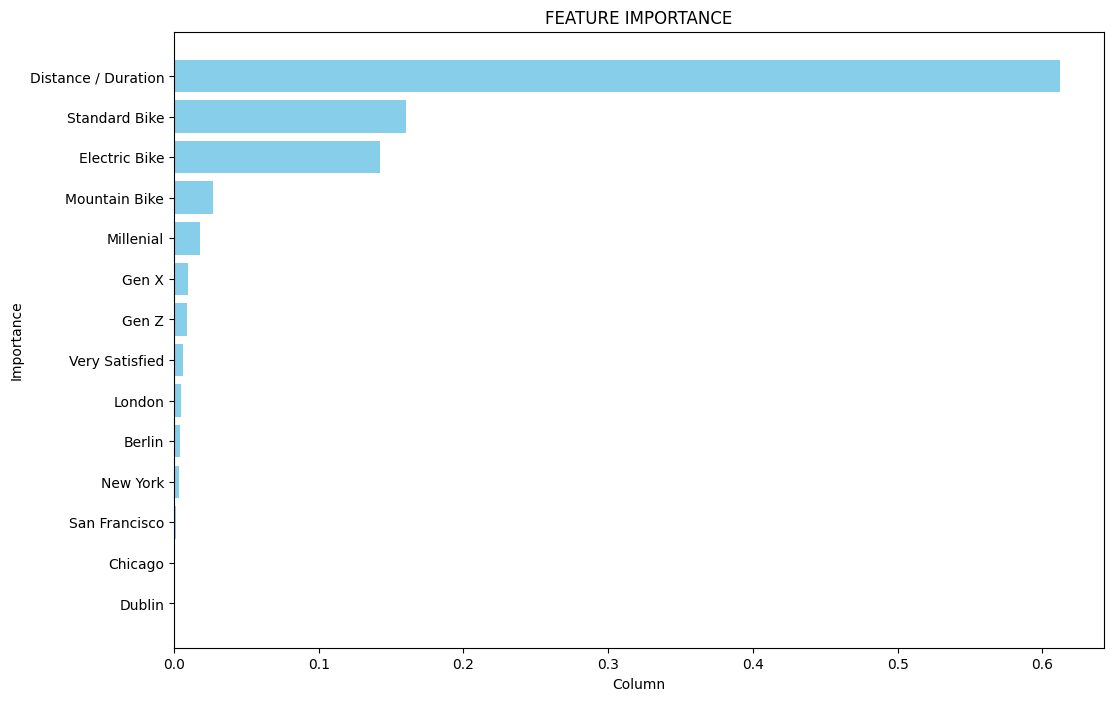

In [198]:
# a bar chart is then used to visualise this hierarchy of relevant features;

plt.figure(figsize = (12, 8))

plt.barh(feature_importance['Column'],
        feature_importance['Importance'],
        color = 'skyblue')

plt.xlabel('Column')
plt.ylabel('Importance')

plt.title('FEATURE IMPORTANCE')

plt.show()

In [200]:
# noise reduction is applied by dropping columns that score low on feature
# importances;

regress_X_train90 = regress_X_train90.drop(columns = ['London',
                                                      'Berlin',
                                                      'Chicago',
                                                      'New York',
                                                      'San Francisco',
                                                      'Dublin',
                                                      'Very Satisfied',
                                                      'Gen Z',
                                                      'Millenial',
                                                      'Gen X'])

regress_X_train75 = regress_X_train75.drop(columns = ['London',
                                                      'Berlin',
                                                      'Chicago',
                                                      'New York',
                                                      'San Francisco',
                                                      'Dublin',
                                                      'Very Satisfied',
                                                      'Gen Z',
                                                      'Millenial',
                                                      'Gen X'])

In [202]:
# the same is done for test sets;

regress_X_test10 = regress_X_test10.drop(columns = ['London',
                                                    'Berlin',
                                                    'Chicago',
                                                    'New York',
                                                    'San Francisco',
                                                    'Dublin',
                                                    'Very Satisfied',
                                                    'Gen Z',
                                                    'Millenial',
                                                    'Gen X'])

regress_X_test25 = regress_X_test25.drop(columns = ['London',
                                                    'Berlin',
                                                    'Chicago',
                                                    'New York',
                                                    'San Francisco',
                                                    'Dublin',
                                                    'Very Satisfied',
                                                    'Gen Z',
                                                    'Millenial',
                                                    'Gen X'])

In [206]:
# and hyperparameters are explored with this dimensionality reduction in mind...

        # number of trees in the forest;

grid = {'n_estimators': [10, 50, 100, 200, 500],    

        # splitting criteria;
        
        'criterion': ['squared_error', 'absolute_error', 'poisson'], 

        # maximum depth of the trees;
        
        'max_depth': [None, 5, 10, 20, 50], 

        # minimum number of samples required to split an internal node;
        
        'min_samples_split': [2, 5, 10, 20], 

        # minimum number of samples required to be at a leaf node;
        
        'min_samples_leaf': [1, 2, 4, 10],

        # minimum fraction of the sum of sample weights at a leaf node;
        
        'min_weight_fraction_leaf': [0.0, 0.1, 0.2],

        # number of features to consider when looking for the best split;
        
        'max_features': ['auto', 'sqrt', 'log2', None],

        # maximum number of leaf nodes in the trees;
        
        'max_leaf_nodes': [None, 10, 50, 100], 

        # minimum impurity decrease required to split a node;
        
        'min_impurity_decrease': [0.0, 0.01, 0.1], 

        # whether bootstrapped samples are used when building trees;
        
        'bootstrap': [True],

        # whether to use out-of-bag samples to estimate the generalization accuracy;
        
        'oob_score': [True, False],

        # complexity parameter for minimal cost-complexity pruning;
        
        'ccp_alpha': [0.0, 0.01, 0.1],  

        # maximum number of samples drawn from the dataset for training;
        
        'max_samples': [None, 0.5, 0.8]}                      

random_search = RandomizedSearchCV(estimator = RFR, 
                                   param_distributions = grid, 

                                   # 10-fold cross-validation;
                                   
                                   cv = 10,    

                                   # evaluation metric;
                                   
                                   scoring = 'accuracy', 

                                   # use all cores;
                                   
                                   n_jobs = -1,                                
                                   verbose = 1,
                                   n_iter = 150)

start = t.time()

random_search.fit(regress_X_train90, 
                  regress_y_train90)

end = t.time()

duration = end - start

print(f'Best Hyperparameters Found: {random_search.best_params_} in: {duration} Seconds')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Best Hyperparameters Found: {'oob_score': True, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.2, 'min_samples_split': 20, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 5, 'criterion': 'absolute_error', 'ccp_alpha': 0.0, 'bootstrap': True} in: 88.69282269477844 Seconds


In [207]:
# optimal parameters are also manually instantiated to the model;

RFR = RandomForestRegressor(oob_score = True,
                            n_estimators = 200,
                            min_weight_fraction_leaf = 0.2,
                            min_samples_split = 20,
                            min_samples_leaf = 4,
                            min_impurity_decrease = 0.0,
                            max_samples = None,
                            max_leaf_nodes = 10,
                            max_features = None,
                            max_depth = 5,
                            criterion = 'absolute_error',
                            ccp_alpha = 0.0,
                            bootstrap = True)

RFR.fit(regress_X_train90,
        regress_y_train90)

# predict using the best model from GridSearchCV;

y_test = regress_y_test10

y_pred = RFR.predict(regress_X_test10)

r2 = r2_score(y_test,
              y_pred)

mae = mean_absolute_error(y_test, 
                          y_pred)

mse = mean_squared_error(y_test,
                         y_pred)

res = f'''R2:{r2}
Mean Absolute Error:{mae}
Mean Squared Error:{mse}'''

print(res)

R2:0.4807011970626891
Mean Absolute Error:5.340636499999998
Mean Squared Error:50.22747029824497


_10 fold cross validation_

In [208]:
# scorers to evaluate cross-validated test results are created
# and instantiated to {mse_scorer} and {mae_scorer};

mean_se = make_scorer(mean_squared_error, 
                      greater_is_better = False)

mean_ae = make_scorer(mean_absolute_error, 
                      greater_is_better = False)

# cross-validation sets are then used to evaluate each metric separately...

kf = KFold(n_splits = 10,
           shuffle = True, 
           random_state = 42)

# negative mean squared error is converted back to its absolute value and cross-validated;

mse_cv = cross_val_score(RFR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf, 
                         scoring = mean_se)

# negative mean absolute error is converted back to its absolute value and cross-validated;

mae_cv = cross_val_score(RFR,
                         regress_X_train90,
                         regress_y_train90,
                         cv = kf,
                         scoring = mean_ae)

# Convert negative values back to positive...

mse_cv = abs(mse_cv)
mae_cv = abs(mae_cv)

# ...and results are printed;

res = f'''Mean Squared Error: {mse_cv.mean()}
Mean Absolute Error: {mae_cv.mean()}'''

print(res)

Mean Squared Error: 58.52327087396329
Mean Absolute Error: 6.1942275


_dimensionality is not an issue, on the contrary, model performance decreased **(albeit marginally)** in accuracy upon feature reduction_

# **RESULTS:**

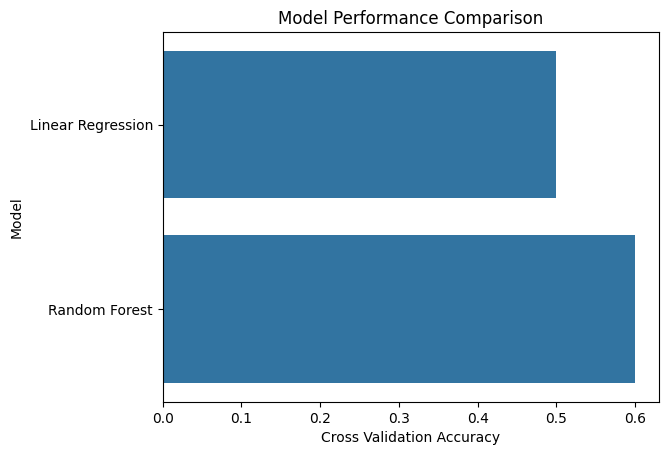

In [212]:
performance_data = {'Model': ['Linear Regression', 
                              'Random Forest'],
                    'Cross Validation Accuracy': [0.50, 0.60]}

df_performance = pd.DataFrame(performance_data)

sns.barplot(x = 'Cross Validation Accuracy',
            y = 'Model', 
            data = df_performance)

plt.title('Model Performance Comparison')
plt.show()

- Linear Regression outperforms Random Forest Regressor in terms of computational efficiency
- However, in this instance Random Forest Regressor outperformed Linear Regression in terms of accuracy by a margin of roughly 10%, indicating that the relationships between dependent and independent variables are inherently nonlinear, however the complexity of the relationships were still not fully captured by the Random Forest Regressor, this could indicate either...
- Feature selection and/or feature availability within the dataset is too limited to enable the model to effectively capture relationships between independent and dependent variables, however an accuracy (r2 score) of approximately 60% could be satisfactory depending on the needs of the business, and the data available to them.
- The Random Forest model lacks the complexity to capture any more complex patterns potentially present within the dataset, in which case alternative methodologies such as utilising gradient boosting techniques or neural network deep learning could further assist the model to capture these relationships. 